# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name: 
1. Rolle Swanljung
2. Anusha Ihalapathirana

Student number: 
1. Rolle - 2619936
2. Anusha - 2703680

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [2]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        # "time", "x", "y", "z"
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)
    
df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [3]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


Person 1 - Excercise 2,5,6


<ipython-input-4-33b683ca9fe5>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_acc_temp = df_acc[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == exercise_ids[i])]


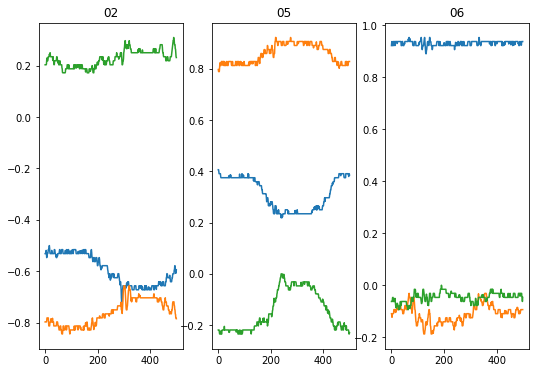

Person 5 - Excercise 2,5,6


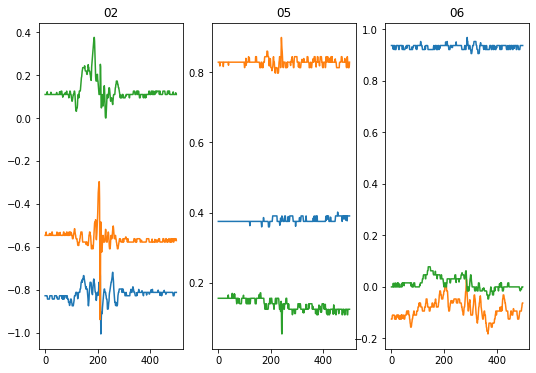

In [4]:
# 1.1. Visualize selected samples for both modalities

# Plot few examples of prepared data for each modalities (accelometer and depth camera). 
# Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image.
# Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6.
# Take the first windowed example from the long exercise sequence. - means index 0

### Your code begins here ###

from matplotlib import pyplot as plt

# this is for getting acc or dc data
def get_few_samples(df, label):
    return df[df['sensor_code'] == label]

df_new = get_few_samples(df_records_windowed, 'act')

# plot 5 seconds windows of acc data based on person and exercise
def plot_acc_data(df_acc, sub_id, exercise_ids, label):
    
    f = plt.figure(figsize=(15,6)) 
    print(label)
    for i in range(0,len(exercise_ids)):
        df_acc_temp = df_acc[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == exercise_ids[i])]
        df_acc0 = df_acc_temp.df.iloc[0]
        df_acc0 = df_acc0.drop('time', axis=1)
        f.add_subplot(1,5,i+1)
        plt.plot(df_acc0)
        plt.title(exercise_ids[i])
        
    plt.show()
    
exercises = ['02','05','06']
plot_acc_data(df_new, '01', exercises, 'Person 1 - Excercise 2,5,6')
plot_acc_data(df_new, '05', exercises, 'Person 5 - Excercise 2,5,6')



Above we can see different axes (x,y,z) of accelerometer in different colors. X axis of the plots is representing time (5 seconds) using 100Hz data. We can see a lot of variation in the graphs even between same exercises.

<ipython-input-5-2042e32b51a6>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dc = df_dc[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == excercise_id)]


Person 1 - Excercise 2


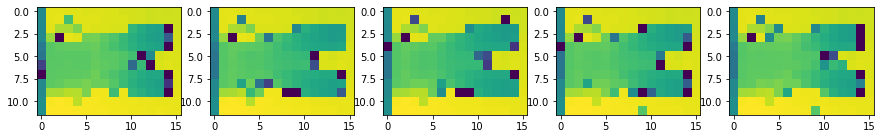

Person 1 - Excercise 5


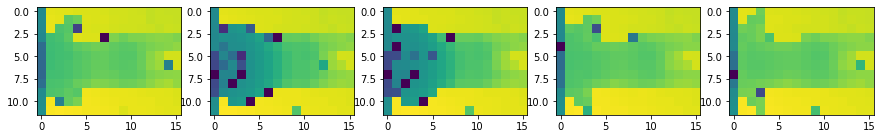

Person 1 - Excercise 6


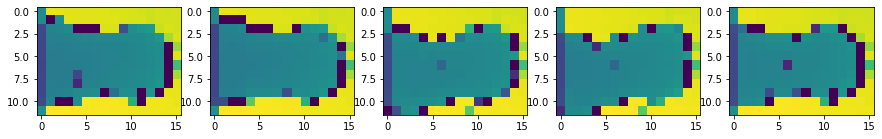

Person 5 - Excercise 2


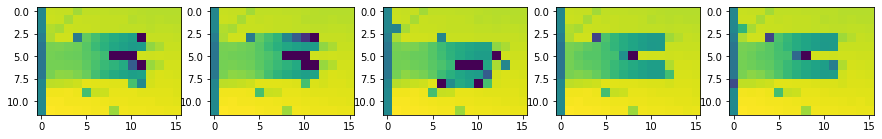

Person 5 - Excercise 5


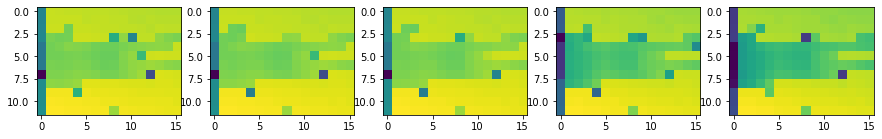

Person 5 - Excercise 6


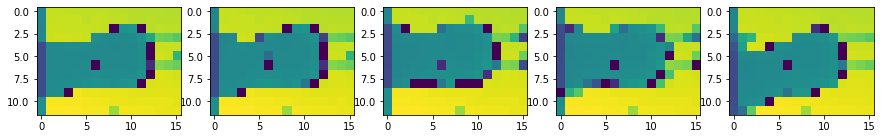

In [5]:

################ Image DC
# Plot depth image sequences

# get image data
df_dc_new = get_few_samples(df_records_windowed, 'dc')

def plot_dc_data(df_dc, sub_id, excercise_id, label):
    
    df_dc = df_dc[(df_records_windowed['subject_id'] == sub_id) & (df_records_windowed['exercise_id'] == excercise_id)]
    df_dc = df_dc.df.iloc[0]
    df_dc = df_dc.drop('time', axis=1)

    dc0 = df_dc.iloc[0].to_numpy().reshape(12,16)
    dc1 = df_dc.iloc[1].to_numpy().reshape(12,16)
    dc2 = df_dc.iloc[2].to_numpy().reshape(12,16)
    dc3 = df_dc.iloc[3].to_numpy().reshape(12,16)
    dc4 = df_dc.iloc[4].to_numpy().reshape(12,16)
    

    f = plt.figure(figsize=(15,6)) 
    print(label)
    f.add_subplot(1,5,1)
    plt.imshow(dc0, interpolation='nearest')
    f.add_subplot(1,5,2)
    plt.imshow(dc1, interpolation='nearest')
    f.add_subplot(1,5,3)
    plt.imshow(dc2, interpolation='nearest')
    f.add_subplot(1,5,4)
    plt.imshow(dc3, interpolation='nearest')
    f.add_subplot(1,5,5)
    plt.imshow(dc4, interpolation='nearest')
    plt.show()

plot_dc_data(df_dc_new, '01', '02', 'Person 1 - Excercise 2')
plot_dc_data(df_dc_new, '01', '05', 'Person 1 - Excercise 5')
plot_dc_data(df_dc_new, '01', '06', 'Person 1 - Excercise 6')

plot_dc_data(df_dc_new, '05', '02', 'Person 5 - Excercise 2')
plot_dc_data(df_dc_new, '05', '05', 'Person 5 - Excercise 5')
plot_dc_data(df_dc_new, '05', '06', 'Person 5 - Excercise 6')


### Your code ends here ###


Above we can see depth images taken every 1 second for 5 seconds each exercise. Images are only 12x16 pixels so the quality is low. The color intensities in same exercises are quite close but shapes differ per person. Here the lack of exercise rhythm cannot be seen that easily.

### Task 1.2

Here we Split the data samples based on subject ID into training and testing datasets. devide data in to training and testing data such that samples of users from 1 to 7 are in training data dan 8 to 10 are in testing dataset.

Merge the acceleration data and image data so that we can remove the unpair windows.

After removing the unnecessary columns we rename other columns. 

Finally printed number of samples, dimensions in training and testing set and visualize training set and testing set 


In [6]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

### Your code begins here ###

# make a copy of df_records_windowed dataframe
df = df_records_windowed.copy()

# convert object types to int to make futher processing easier
df['subject_id'] = df_records_windowed['subject_id'].astype(str).astype(int)
df['exercise_id'] = df_records_windowed['exercise_id'].astype(str).astype(int)


df_train = df[df['subject_id'] <= 7] # train data -> users upto id = 7 
df_test = df[df['subject_id'] >= 8] # test data -> users from = 8 to 10

# merge 2 dataframes so that we can remove the unpaired windows.
def pair(df):

    df_acc = df[df['sensor_code'] == 'act']
    df_dc = df[df['sensor_code'] == 'dc']
    
    new_df = pd.merge(df_acc, df_dc,  how='right', left_on=['subject_id','trial', 'window_idx', 'exercise_id'],
                      right_on = ['subject_id','trial', 'window_idx', 'exercise_id'])

    return new_df
    

df_train_pair = pair(df_train)
df_test_pair = pair(df_test)

# remove un necessary columns since we pair up the data we dont need this
df_train_pair = df_train_pair.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)
df_test_pair = df_test_pair.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)

df_train_pair = df_train_pair.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})
df_test_pair = df_test_pair.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})

df_test_pair.dtypes

# calculate the indicator statistics of training and testing datasets
# (number of examples, dimensions of each example) and visualize prepared examples

# df train data 
print("==========  Training dataset  =============")

# df_train_pair.info()
print('Number of rows in training set - ', len(df_train_pair))
print('Number of Columns/dimentions in training set - ', len(df_train_pair.columns))
print('Shape of the training set - ', df_train_pair.shape)
print('Column names of training set - ', list(df_train_pair.columns))

print("\n==========  Testing dataset  =============")
print('Number of rows in test set - ', len(df_test_pair))
print('Number of Columns/dimentions in test set - ', len(df_test_pair.columns))
print('Shape of the test set - ', df_test_pair.shape)
print('Column names of test set - ', list(df_test_pair.columns))



==========  Training dataset  =============
Number of rows in training set -  1486
Number of Columns/dimentions in training set -  6
Shape of the training set -  (1486, 6)
Column names of training set -  ['subject_id', 'exercise_id', 'trial', 'df_acc', 'window_idx', 'df_dc']

==========  Testing dataset  =============
Number of rows in test set -  598
Number of Columns/dimentions in test set -  6
Shape of the test set -  (598, 6)
Column names of test set -  ['subject_id', 'exercise_id', 'trial', 'df_acc', 'window_idx', 'df_dc']


Below are Training and testing dataset 

In [7]:

print('\n Training set')
df_train_pair



 Training set


,subject_id,exercise_id,trial,df_acc,window_idx,df_dc
0,1,1,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,1,1,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,1,1,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,1,1,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,1,1,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...
...,...,...,...,...,...,...
1481,7,7,1,time acc_0 acc_1 acc_2 66...,33,time dc_0 dc_1 dc_2 dc_3 ...
1482,7,7,1,time acc_0 acc_1 acc_2 68...,34,time dc_0 dc_1 dc_2 dc_3 ...
1483,7,7,1,time acc_0 acc_1 acc_2 70...,35,time dc_0 dc_1 dc_2 dc_3 ...
1484,7,7,1,time acc_0 acc_1 acc_2 72...,36,time dc_0 dc_1 dc_2 dc_3 ...


In [8]:
print('\n Testing set')
df_test_pair



 Testing set


,subject_id,exercise_id,trial,df_acc,window_idx,df_dc
0,8,1,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,8,1,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,8,1,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,8,1,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,8,1,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...
...,...,...,...,...,...,...
593,10,7,1,time acc_0 acc_1 acc_2 50...,25,time dc_0 dc_1 dc_2 dc_3 ...
594,10,7,1,time acc_0 acc_1 acc_2 52...,26,time dc_0 dc_1 dc_2 dc_3 ...
595,10,7,1,time acc_0 acc_1 acc_2 54...,27,time dc_0 dc_1 dc_2 dc_3 ...
596,10,7,1,time acc_0 acc_1 acc_2 56...,28,time dc_0 dc_1 dc_2 dc_3 ...


Visualization of acceleration data on training dataset (person 1,2,3 doing excercise 1) and testing dataset(person 8,9,10 doing excercise 1) 

Person 1 - Excercise 1


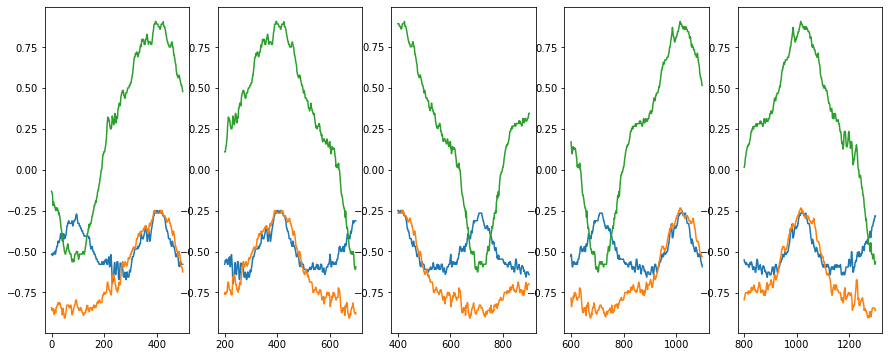

Person 2 - Excercise 1


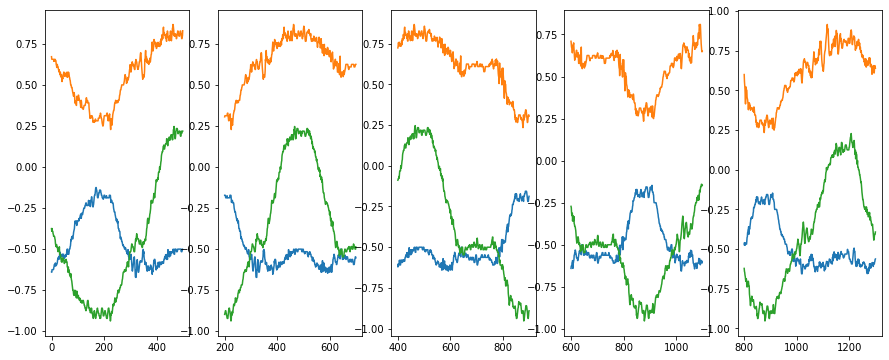

Person 3 - Excercise 1


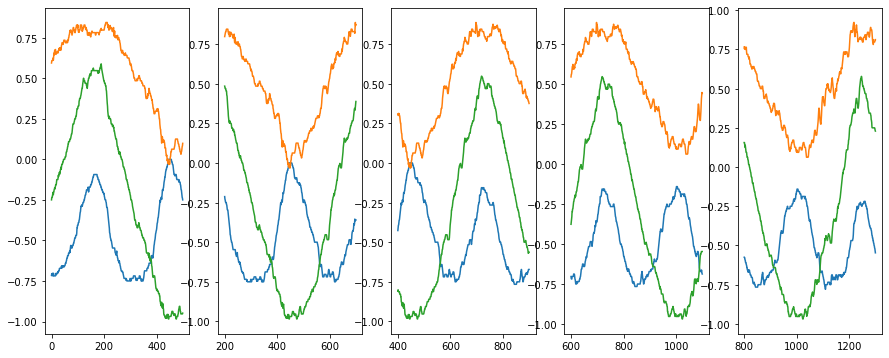

Person 8 - Excercise 1


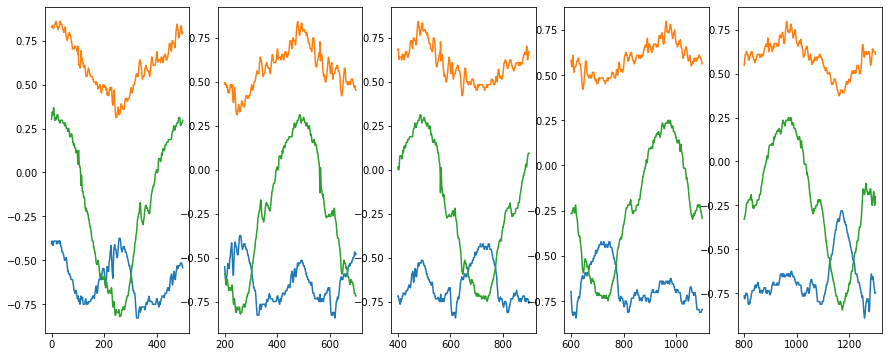

Person 9 - Excercise 1


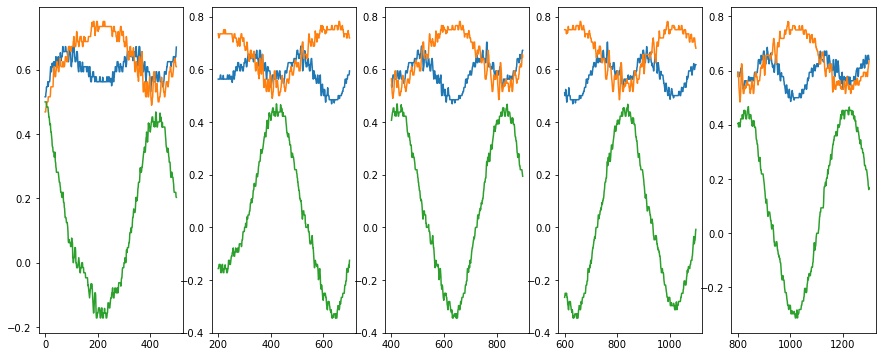

Person 10 - Excercise 1


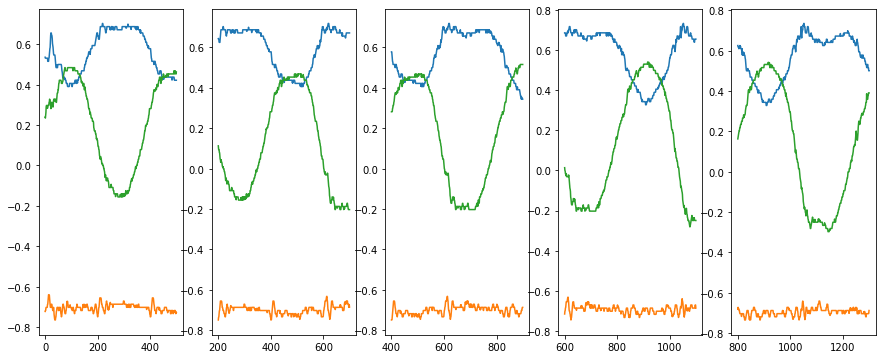

In [9]:

def plot_5_window_acc_data(df_acc, sub_id, excercise_id, label):
    
    df_acc = df_acc[(df_acc['subject_id'] == sub_id) & (df_acc['exercise_id'] == excercise_id)]
    df_acc0 = df_acc.df_acc.iloc[0]
    df_acc0 = df_acc0.drop('time', axis=1)
    df_acc1 = df_acc.df_acc.iloc[1]
    df_acc1 = df_acc1.drop('time', axis=1)
    df_acc2 = df_acc.df_acc.iloc[2]
    df_acc2 = df_acc2.drop('time', axis=1)
    df_acc3 = df_acc.df_acc.iloc[3]
    df_acc3 = df_acc3.drop('time', axis=1)
    df_acc4 = df_acc.df_acc.iloc[4]
    df_acc4 = df_acc4.drop('time', axis=1)
   
    f = plt.figure(figsize=(15,6)) 
    print(label)
    
    f.add_subplot(1,5,1)
    plt.plot(df_acc0)
    f.add_subplot(1,5,2)
    plt.plot(df_acc1)
    f.add_subplot(1,5,3)
    plt.plot(df_acc2)
    f.add_subplot(1,5,4)
    plt.plot(df_acc3)
    f.add_subplot(1,5,5)
    plt.plot(df_acc4)
    plt.show()
    

plot_5_window_acc_data(df_train_pair, 1, 1, 'Person 1 - Excercise 1')
plot_5_window_acc_data(df_train_pair, 2, 1, 'Person 2 - Excercise 1')
plot_5_window_acc_data(df_train_pair, 3, 1, 'Person 3 - Excercise 1')

plot_5_window_acc_data(df_test_pair, 8, 1, 'Person 8 - Excercise 1')
plot_5_window_acc_data(df_test_pair, 9, 1, 'Person 9 - Excercise 1')
plot_5_window_acc_data(df_test_pair, 10, 1, 'Person 10 - Excercise 1')



Without standardization there is a lot of variation per axis. Also from the graphs above can be seen that there is no forced rhythm for the exercises.

Visualization of depth camera data on training dataset (pearson 1,2,3 doing excercise 1) and testing dataset(pearson 8,9,10 doing excercise 1)

Person 1 - Excercise 1


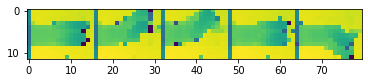

Person 2 - Excercise 1


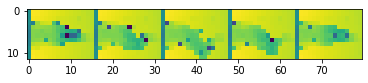

Person 3 - Excercise 1


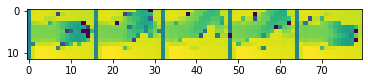

Person 8 - Excercise 1


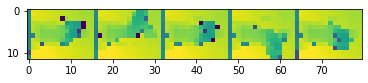

Person 9 - Excercise 1


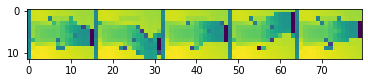

Person 10 - Excercise 1


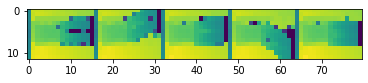

In [10]:

def plot_dc_data(df_dc1, sub_id, excercise_id, label):
    
    df_dc1 = df_dc1[(df_dc1['subject_id'] == sub_id) & (df_dc1['exercise_id'] == excercise_id)]
    df_dc = df_dc1.df_dc.iloc[0]
    df_dc = df_dc.drop('time', axis=1)
    print(label)
    img_arr = df_dc.iloc[0].to_numpy().reshape(12,16)
    for i in range(1,len(df_dc)):
        img_arr = np.concatenate((img_arr, df_dc.iloc[i].to_numpy().reshape(12,16)), axis=1)
    plt.imshow(img_arr, interpolation='nearest')
    plt.show()


plot_dc_data(df_train_pair, 1, 1, 'Person 1 - Excercise 1')
plot_dc_data(df_train_pair, 2, 1, 'Person 2 - Excercise 1')
plot_dc_data(df_train_pair, 3, 1, 'Person 3 - Excercise 1')

plot_dc_data(df_test_pair, 8, 1, 'Person 8 - Excercise 1')
plot_dc_data(df_test_pair, 9, 1, 'Person 9 - Excercise 1')
plot_dc_data(df_test_pair, 10, 1, 'Person 10 - Excercise 1')


### Your code ends here ###


From the images it would be really hard to say every person is doing the same exercise.

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 23-24) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

### Task 2.1

Downsample and standardization for training and test sets

In [11]:
# 2.1

### Your code begins here ###
from scipy import signal

# downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix 
# of data for each 5 sec window. 

# get accelerometer  data from training set
train_set = df_train_pair.copy()
test_set = df_test_pair.copy()

# standardize the acc data. both training and testing data - x,y,z axis wise
# used training set mean and std to standardize the testing set
def standardize_acc(traindata,testdata):
    for i in range(traindata.shape[2]):
        testdata[:,:,i] = (testdata[:,:,i] - np.mean(traindata[:,:,i],axis=0)) / np.std(traindata[:,:,i],axis=0)
        traindata[:,:,i] = (traindata[:,:,i] - np.mean(traindata[:,:,i],axis=0)) / np.std(traindata[:,:,i],axis=0)
    return traindata,testdata
    
# use downsample method row by row
def downsample(row):
    row = signal.resample(row, 125)
    return row

# drop the time axis in acc dataset.
def drop_time(row):
    row = row.drop(['time'], axis = 1)
    return row
    
# drop time axis, downsample the data and standardize
train_acc = np.array([downsample(drop_time(x)) for x in train_set['df_acc']])
test_acc = np.array([downsample(drop_time(x)) for x in test_set['df_acc']])

train_acc, test_acc = standardize_acc(train_acc,test_acc)

print(train_acc.shape)
print(test_acc.shape)

(1486, 125, 3)
(598, 125, 3)


#### Calculate PCA transformation to reduce the dimensionality of accelerometer data to 5

In [12]:
#  Using training dataset, fit PCA with 5-dimensional subspace 
# (i.e., choosing the 5 largest principal components)
# and fit LDA with 5-dimensional subspace. 

from sklearn.decomposition import PCA

pca_train_acc = train_acc.copy()
pca_test_acc = test_acc.copy()

dim = 5

pca = PCA(n_components=dim)

# fit PCA axis-wise
def pca_transform_acc(traindata,testdata,dim):
    pca_train = np.empty((traindata.shape[0],dim,traindata.shape[2])) ### Same shape as original data except (dim) is the PCA dimension
    pca_test = np.empty((testdata.shape[0],dim,testdata.shape[2])) ### Same shape as original data except (dim) is the PCA dimension
    for i in range(traindata.shape[2]):
        pca_train[:,:,i] = pca.fit_transform(traindata[:,:,i])
        pca_test[:,:,i] = pca.transform(testdata[:,:,i])
    return pca_train,pca_test

def acc_data_to_pandas(data):
    df = [pd.DataFrame(data=x.T) for x in data]   # DO NOT REMOVE
#     df = pd.DataFrame(data=[pd.DataFrame(data=x.T) for x in data])
    return df

pca_train,pca_test = pca_transform_acc(pca_train_acc,pca_test_acc,dim)

pca_train_df = train_set.copy()
pca_test_df = test_set.copy()

print(pca_train.shape)

pca_train_df['df_acc'] = acc_data_to_pandas(pca_train)
pca_test_df['df_acc'] = acc_data_to_pandas(pca_test)


(1486, 5, 3)


In [13]:
pca_train_df['df_acc'][0]  # check data

,0,1,2,3,4
0,-7.031973,0.108189,1.425941,-0.427276,-1.034922
1,13.463812,-4.222707,-0.105760,-0.419117,0.888549
2,-5.292385,-12.895922,-1.905584,1.255842,0.379985


#### Calculate LDA transformation to reduce the dimensionality of accelerometer data to 5

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_train_acc = train_acc.copy() # Copy original dataset so it is not affected
lda_test_acc = test_acc.copy()

dim = 5
lda = LinearDiscriminantAnalysis(n_components=dim) # LDA with 5 dimensions

def lda_transform_acc(traindata,testdata,dim):
    lda_train = np.empty((traindata.shape[0],dim,traindata.shape[2])) ### Same shape as original data except dim is the PCA dimension
    lda_test = np.empty((testdata.shape[0],dim,testdata.shape[2])) ### Same shape as original data except dim is the PCA dimension
    for i in range(traindata.shape[2]):
        lda_train[:,:,i] = lda.fit_transform(traindata[:,:,i],train_set['exercise_id'])
        lda_test[:,:,i] = lda.transform(testdata[:,:,i])
    return lda_train,lda_test

lda_train,lda_test = lda_transform_acc(lda_train_acc,lda_test_acc,dim)

lda_train_df = train_set.copy()
lda_test_df = test_set.copy()

lda_train_df['df_acc'] = acc_data_to_pandas(lda_train)
lda_test_df['df_acc'] = acc_data_to_pandas(lda_test)

In [15]:
lda_train_df['df_acc'][0] # check data 

,0,1,2,3,4
0,2.587091,-0.211466,-2.451993,0.577486,-0.473091
1,-0.195536,1.392326,0.243445,0.876051,1.018085
2,1.042676,2.872428,1.701427,1.275850,-0.499874


PCA and LDA fusion for accelerometer data

In [16]:
def pair(x):
    new_df = pd.concat([x[0], x[1]], axis=1, ignore_index=True)
    return new_df.to_numpy()
    
# Combine PCA and LDA data to 3x10 (3x5+5) shape
train_pca_lda_acc = [pair(x) for i,x in enumerate(zip(pca_train_df['df_acc'],lda_train_df['df_acc']))]
train_pca_lda_acc = np.array(train_pca_lda_acc)
test_pca_lda_acc = [pair(x) for i,x in enumerate(zip(pca_test_df['df_acc'],lda_test_df['df_acc']))]
test_pca_lda_acc = np.array(test_pca_lda_acc)

def compute_distance_acc(testsample):
    pca_distance = np.sum(np.sum(np.square(testsample[:,0:5] - train_pca_lda_acc[:,:,0:5]),axis=2),axis=1)
    lda_distance = np.sum(np.sum(np.square(testsample[:,5:10] - train_pca_lda_acc[:,:,5:10]),axis=2),axis=1)
    pca_distance = scale_distance(pca_distance)    
    lda_distance = scale_distance(lda_distance)
    return [pca_distance, lda_distance]

def scale_distance(distance):
    scaled_distance = (distance - np.min(distance)) / (np.max(distance) - np.min(distance))
    return scaled_distance

def fuse_average(dists):
    fused_avg = (dists[0]+dists[1]) / 2
    return fused_avg
    
def classify(fused_avg):
    class_prediction = train_set['exercise_id'][np.argmin(fused_avg)]
    return class_prediction

test_predictions = [classify(fuse_average(compute_distance_acc(x))) for i,x in enumerate(test_pca_lda_acc)]

Performance evaluation

Classification report: 
               precision    recall  f1-score   support

        ex 1       0.11      0.82      0.19        11
        ex 2       0.35      0.21      0.26       138
        ex 3       0.26      0.29      0.27        76
        ex 4       0.86      1.00      0.93        69
        ex 5       0.67      0.63      0.65        95
        ex 6       0.68      0.37      0.48       163
        ex 7       0.35      0.65      0.46        46

    accuracy                           0.47       598
   macro avg       0.47      0.57      0.46       598
weighted avg       0.53      0.47      0.47       598

Precision score: 
 [0.10588235 0.3452381  0.25581395 0.8625     0.66666667 0.68181818
 0.35294118]
Recall score: 
 [0.81818182 0.21014493 0.28947368 1.         0.63157895 0.36809816
 0.65217391]
Accuracy score: 
 0.4665551839464883
F1 score: 
 0.461613180200539


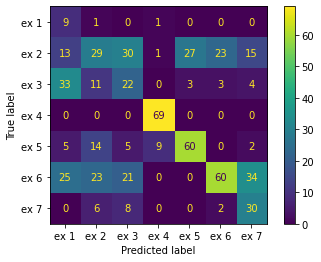

In [17]:
from sklearn import metrics

def stats_and_cf(test_predictions, test_true_labels):
    class_labels = ['ex 1','ex 2','ex 3','ex 4','ex 5','ex 6', 'ex 7']

    pre = metrics.precision_score(test_predictions, test_true_labels,average=None, zero_division=0)
    recall = metrics.recall_score(test_predictions, test_true_labels,average=None, zero_division=0)
    f1 = (1/len(class_labels))*np.sum(2*(pre*recall)/(pre+recall))

    print("Classification report: \n", metrics.classification_report(test_predictions, test_true_labels, target_names=class_labels))
    print("Precision score: \n", pre)
    print("Recall score: \n", recall)
    print("Accuracy score: \n", metrics.accuracy_score(test_predictions, test_true_labels))
    print("F1 score: \n", f1)

    # Confusion matrix for testing set
    cm = metrics.confusion_matrix(test_predictions,test_true_labels)
    metrics.ConfusionMatrixDisplay(cm,display_labels=class_labels).plot()


stats_and_cf(test_predictions, test_set['exercise_id'].to_numpy())
### End of task 2.1
### Your code ends here ###

### Evaluation result analysis

Acceleration model shows overall 0.466 accuracy with 0.461 F1 socre.

This model shows low performance when predicting excercise 1 samples. It predict excercise 4 with high performance which has 0.93 F1 score and 0.86 precision and 1 recall.

### Task 2.2 

Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results.

In [18]:
# 2.2

### Your code begins here ###

# standardize the values to zero mean and unit variance before the transformations
def standardize_dc(traindata,testdata):
    for i in range(traindata.shape[1]):
        testdata[:,i,:] = (testdata[:,i,:] - np.mean(traindata[:,i,:],axis=0)) / np.std(traindata[:,i,:],axis=0)
        traindata[:,i,:] = (traindata[:,i,:] - np.mean(traindata[:,i,:],axis=0)) / np.std(traindata[:,i,:],axis=0)
    return traindata,testdata

# drop time axis from the data
train_dc = np.array([drop_time(x).to_numpy() for x in train_set['df_dc']])
test_dc = np.array([drop_time(x).to_numpy() for x in test_set['df_dc']])

train_dc, test_dc = standardize_dc(train_dc,test_dc)

print(train_dc.shape)
print(test_dc.shape)

(1486, 5, 192)
(598, 5, 192)


In [19]:
print(train_dc[0,:,:10])

[[ 0.16543862  0.19698946  0.26540844  0.20680413  0.2167206   0.21343916
   0.1641128   0.19240774  0.20327633  0.19046642]
 [ 0.17484267  0.18772165  0.24417146  0.20821472  0.19498516  0.21529259
   0.19602334  0.21457261  0.20457531  0.19572609]
 [ 0.16028319  0.19303346  0.24616026  0.20673223  0.20583403  0.21345645
   0.16480888  0.19195034  0.18861561 -2.89764314]
 [ 0.16976973  0.18298206  0.2584946   0.20727673  0.19465254  0.21411083
   0.17740476  0.21347544  0.20302725  0.19709138]
 [ 0.17316254  0.1925213   0.26146513  0.20683679  0.22125741  0.20571418
   0.17869058  0.18975956  0.20876647  0.1741041 ]]


#### Calculate PCA transformation to reduce the dimensionality of depth camera data to 5

In [20]:
from sklearn.decomposition import PCA

dim = 5
pca = PCA(n_components=dim)

def pca_transform_dc(traindata,testdata,dim):
    pca_train = np.empty((traindata.shape[0],traindata.shape[1],dim)) ### Same shape as original data except 5 is the PCA dimension
    pca_test = np.empty((testdata.shape[0],testdata.shape[1],dim)) ### Same shape as original data except 5 is the PCA dimension
    for i in range(traindata.shape[1]):
        pca_train[:,i,:] = pca.fit_transform(traindata[:,i,:])
        pca_test[:,i,:] = pca.transform(testdata[:,i,:])
    return pca_train,pca_test

pca_train,pca_test = pca_transform_dc(train_dc,test_dc,dim)

pca_train_df['df_dc'] = [x.reshape((5,1,5)) for i,x in enumerate(pca_train)]
pca_test_df['df_dc'] = [x.reshape((5,1,5)) for i,x in enumerate(pca_test)]

In [21]:
display(pca_train_df['df_dc'][0].shape)
pca_train_df['df_dc'][0]

(5, 1, 5)

array([[[-2.97334162,  2.56500262, -1.83071186,  0.36649862,
          0.30650713]],

       [[-3.11773987, -3.04508581,  0.56037004,  2.88146317,
          7.55240076]],

       [[-3.06634383, -3.31405738,  0.87860365,  3.86661138,
          5.64898344]],

       [[-3.01604911,  2.20939921,  1.51047915,  0.13269858,
          0.28279464]],

       [[-2.73131195,  9.09878408,  3.65629442,  2.65353659,
          0.68257245]]])

#### Calculate LDA transformation to reduce the dimensionality of depth camera data to 5

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_train_df = train_set.copy() # Copy original dataset so it is not affected
lda_test_df = test_set.copy()

dim = 5
lda = LinearDiscriminantAnalysis(n_components=dim) # LDA with 5 dimensions

def lda_transform_dc(traindata,testdata,dim):
    lda_train = np.empty((traindata.shape[0],traindata.shape[1],dim)) ### Same shape as original data except 5 is the PCA dimension
    lda_test = np.empty((testdata.shape[0],testdata.shape[1],dim)) ### Same shape as original data except 5 is the PCA dimension
    for i in range(traindata.shape[1]):
        lda_train[:,i,:] = lda.fit_transform(traindata[:,i,:],train_set['exercise_id'])
        lda_test[:,i,:] = lda.transform(testdata[:,i,:])
    return lda_train,lda_test

lda_train,lda_test = lda_transform_dc(train_dc,test_dc,dim)

lda_train_df['df_dc'] = [x.reshape((5,1,5)) for i,x in enumerate(lda_train)]
lda_test_df['df_dc'] = [x.reshape((5,1,5)) for i,x in enumerate(lda_test)]

In [23]:
display(lda_train_df['df_dc'][0].shape)
lda_train_df['df_dc'][0]

(5, 1, 5)

array([[[-2.87085847, -0.55793268, -1.44904624,  0.34163065,
         -0.96770942]],

       [[-2.95625104,  1.10644553, -3.7219096 ,  2.985503  ,
          0.96474008]],

       [[-2.44887438,  1.88566933, -1.97398147,  1.22510177,
          0.8185776 ]],

       [[-2.12071165, -0.38062864, -0.51550936,  0.44090243,
          0.82753076]],

       [[-2.62047855,  1.77503591, -4.0082541 ,  3.33887385,
         -1.21703588]]])

In [24]:
def pair(x):
    new_df = np.dstack([x[0], x[1]]) 
    return new_df

# Combine PCA and LDA data to 5x1x(5+5) shape    
train_pca_lda_df = [pair(x) for i,x in enumerate(zip(pca_train_df['df_dc'],lda_train_df['df_dc']))] 
train_pca_lda_df = np.array(train_pca_lda_df)
test_pca_lda_df = [pair(x) for i,x in enumerate(zip(pca_test_df['df_dc'],lda_test_df['df_dc']))]
test_pca_lda_df = np.array(test_pca_lda_df)

def compute_distance_dc(testsample):
    pca_distance = np.sum(np.sum(np.sum(np.square(testsample[:,:,0:5] - train_pca_lda_df[:,:,:,0:5]),axis=2),axis=1), axis = 1)
    lda_distance = np.sum(np.sum(np.sum(np.square(testsample[:,:,5:10] - train_pca_lda_df[:,:,:,5:10]),axis=2),axis=1), axis=1)
    pca_distance = scale_distance(pca_distance)    
    lda_distance = scale_distance(lda_distance)
    return [pca_distance, lda_distance]
    
def classify(fused_avg):
    class_prediction = lda_train_df['exercise_id'][np.argmin(fused_avg)]
    return class_prediction

test_predictions = [classify(fuse_average(compute_distance_dc(x))) for i,x in enumerate(test_pca_lda_df)]

test_pca_lda_df.shape

(598, 5, 1, 10)

Evaluation

Classification report: 
               precision    recall  f1-score   support

        ex 1       1.00      0.41      0.58       207
        ex 2       0.63      0.45      0.53       117
        ex 3       0.01      0.07      0.02        15
        ex 4       0.26      0.95      0.41        22
        ex 5       0.73      1.00      0.85        66
        ex 6       0.35      0.97      0.52        32
        ex 7       0.96      0.59      0.73       139

    accuracy                           0.57       598
   macro avg       0.57      0.63      0.52       598
weighted avg       0.80      0.57      0.61       598

Precision score: 
 [1.         0.63095238 0.01162791 0.2625     0.73333333 0.35227273
 0.96470588]
Recall score: 
 [0.41062802 0.45299145 0.06666667 0.95454545 1.         0.96875
 0.58992806]
Accuracy score: 
 0.5668896321070234
F1 score: 
 0.5194407172778946


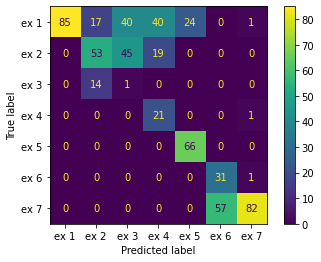

In [25]:
from sklearn import metrics

stats_and_cf(test_predictions, test_set['exercise_id'].to_numpy())

### End of task 2.2
### Your code ends here ###

#### Depth camera model evaluation analysis

This model perform with 0.56 accuracy and 0.51 F1 score.

Depth camera model shows very poor performance when predicting excercise 3 with 0.02 F1 score. Model was able to predict all the data points with excercise 1 where precision is 1 and 0.58 F1 score. this low F1 is due to the low recall in excercise 1 prediction. But in overall this model predict excercise 5 better with 0.85 F1 score.

### Task 2 overall results comparison

The model based on depth camera perform better with compared to the accelaration feature based model.
depth camera feature based model reach 0.566 accuracy with 0.519 F1 score while acceleration feature based model has 0.466 accuracy with 0.461 F1 score.

But both models perform high performance on different classes. as example acceleration model predict excercise 4 with 0.93 F1 score and in depth camera model F1 score of excercise 4 is 0.41.

By fusing these 2 features together can improve the model.


# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

### Task 3.1

PCA with 10 dimensions for ACC data

In [26]:
# 3.1

### Your code begins here ###

pca_train_df = train_set.copy()
pca_test_df = test_set.copy()

#train_set = df_train_pair.copy()
#test_set = df_test_pair.copy()

# downsample and standardize the data
train_acc = np.array([downsample(drop_time(x)) for x in pca_train_df['df_acc']])
test_acc = np.array([downsample(drop_time(x)) for x in pca_test_df['df_acc']])

train_acc, test_acc = standardize_acc(train_acc,test_acc)

dim = 10
pca = PCA(n_components=dim)

train_acc,test_acc = pca_transform_acc(train_acc,test_acc,dim)

def mean_std_vector(data):
    meanstd = np.empty((data.shape[0],data.shape[2],2))
    for i in range (data.shape[2]):
        meanstd[:,i,0] = np.mean(data[:,:,i],axis=1)
        meanstd[:,i,1] = np.std(data[:,:,i],axis=1)
    meanstd = meanstd.reshape((meanstd.shape[0],-1))
    return meanstd

def combine_rows_horizontally(row): # Calling this function, order of rows matter.
    df_line = row[0].flatten(order='F')
    for i in range(1, len(row)):
        df_line = np.hstack((df_line,row[i]))
    return df_line

train_meanstd = mean_std_vector(train_acc)
test_meanstd = mean_std_vector(test_acc)

# combine PCA data and mean/SD channels
pca_train_df['df_acc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(train_acc,train_meanstd))] # Combine function is called and train_mean_std_vector is placed at the end.
pca_test_df['df_acc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(test_acc,test_meanstd))]
### Your code ends here ###

In [27]:
display(pca_train_df['df_acc'][0].shape)
pca_train_df['df_acc'][0]

(36,)

array([ -7.03197322,   0.10818853,   1.42594062,  -0.4272761 ,
        -1.03492227,  -0.15581897,   0.60624243,   0.05223863,
        -0.04593864,  -0.14333439,  13.46381236,  -4.22270687,
        -0.1057602 ,  -0.41911659,   0.88854907,   0.22587737,
         0.26572578,  -0.14021621,  -0.27374754,   0.08934263,
        -5.29238451, -12.89592196,  -1.90558446,   1.25584156,
         0.37998503,  -1.43217275,  -0.02192067,  -0.19529458,
        -0.25865822,   0.5235934 ,  -0.66466534,   2.20786506,
         0.97717598,   4.36757761,  -1.98425172,   4.03392068])

### Task 3.2

PCA with 10 dimensions for DC data

In [28]:
# 3.2

### Your code begins here ###
dim = 10
pca = PCA(n_components=dim)

# drop time column and standardize the data
train_dc = np.array([drop_time(x).to_numpy() for x in pca_train_df['df_dc']])
test_dc = np.array([drop_time(x).to_numpy() for x in pca_test_df['df_dc']])

train_dc, test_dc = standardize_dc(train_dc,test_dc)

pca_train,pca_test = pca_transform_dc(train_dc,test_dc,dim)

pca_train_df['df_dc'] = [x.flatten() for i,x in enumerate(pca_train)]
pca_test_df['df_dc'] = [x.flatten() for i,x in enumerate(pca_test)]
### Your code ends here ###

In [29]:
display(pca_train_df['df_dc'][0].shape)
pca_train_df['df_dc'][0]

(50,)

array([-2.97334162,  2.56500063, -1.8307077 ,  0.36645257,  0.30616746,
        0.22886466, -0.46862919,  0.78407529, -0.20864579, -0.42817192,
       -3.11773987, -3.04508679,  0.56033949,  2.88168669,  7.55308596,
        2.86489571, -0.56636593, -3.52624081, -1.49743446,  3.30854964,
       -3.06634383, -3.31403863,  0.87860236,  3.86652844,  5.64833303,
        1.5947726 , -0.57735747, -2.60064319, -0.11474674,  0.90457484,
       -3.01604911,  2.20940451,  1.51047752,  0.13273164,  0.28225064,
        0.01609842, -1.01216735,  0.62786663, -0.2698963 , -0.33160105,
       -2.73131195,  9.09880289,  3.6563322 ,  2.65401505,  0.6850815 ,
        4.93899693,  3.72680954,  1.51767203,  2.57903742, -1.63393593])

### Task 3.3

Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.

In [30]:
# 3.3

### Your code begins here ###
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

trainset = [combine_rows_horizontally(x) for i,x in enumerate(zip(pca_train_df['df_acc'],pca_train_df['df_dc']))]
trainset = np.array(trainset)
# trainset = scaler.fit_transform(trainset)

testset = [combine_rows_horizontally(x) for i,x in enumerate(zip(pca_test_df['df_acc'], pca_test_df['df_dc']))]
testset = np.array(testset)
# testset = scaler.transform(testset)


def min_max_standardize(traindata,testdata):
    testdata = (testdata - np.min(traindata)) /(np.max(traindata) -  np.min(traindata))
    traindata = (traindata - np.min(traindata)) /(np.max(traindata) -  np.min(traindata))
    return traindata,testdata

trainset, testset = min_max_standardize(trainset,testset)


svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(trainset, train_set['exercise_id'])
svm_predictions = svm_clf.predict(testset)

gnb_clf = GaussianNB()
gnb_clf.fit(trainset, train_set['exercise_id'])
gnb_predictions = gnb_clf.predict(testset)


Support vector machines classification
Classification report: 
               precision    recall  f1-score   support

        ex 1       1.00      0.42      0.59       204
        ex 2       0.65      0.66      0.66        83
        ex 3       0.20      1.00      0.33        17
        ex 4       0.84      1.00      0.91        67
        ex 5       0.60      1.00      0.75        54
        ex 6       0.01      1.00      0.02         1
        ex 7       1.00      0.49      0.66       172

    accuracy                           0.61       598
   macro avg       0.61      0.80      0.56       598
weighted avg       0.87      0.61      0.66       598

Precision score: 
 [1.         0.6547619  0.19767442 0.8375     0.6        0.01136364
 1.        ]
Recall score: 
 [0.41666667 0.6626506  1.         1.         1.         1.
 0.49418605]
Accuracy score: 
 0.6086956521739131
F1 score: 
 0.5603614502016167


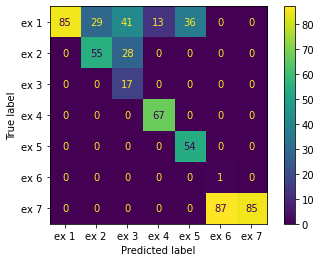

In [31]:
print('Support vector machines classification')
stats_and_cf(svm_predictions, test_set['exercise_id'].to_numpy())

Gaussian Naive Bayes classification
Classification report: 
               precision    recall  f1-score   support

        ex 1       0.99      0.39      0.56       217
        ex 2       0.05      0.29      0.08        14
        ex 3       0.48      1.00      0.65        41
        ex 4       0.54      1.00      0.70        43
        ex 5       0.41      1.00      0.58        37
        ex 6       1.00      0.83      0.91       106
        ex 7       1.00      0.61      0.76       140

    accuracy                           0.64       598
   macro avg       0.64      0.73      0.60       598
weighted avg       0.87      0.64      0.67       598

Precision score: 
 [0.98823529 0.04761905 0.47674419 0.5375     0.41111111 1.
 1.        ]
Recall score: 
 [0.38709677 0.28571429 1.         1.         1.         0.83018868
 0.60714286]
Accuracy score: 
 0.6387959866220736
F1 score: 
 0.6040327918219213


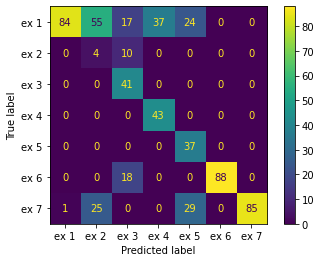

In [32]:
print("Gaussian Naive Bayes classification")
stats_and_cf(gnb_predictions, test_set['exercise_id'].to_numpy())

Both support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier perform better (with 10 dimensional data) than nearest neighbor classifier (with 5 dimensional data). The best results are from Gaussian naive Bayes classifier with 60% F1 score. That is quite low but it has to do with low resolution images and only one accelerometer in use. Also training data size could be bigger.

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

### Task 4.1 

Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (C parameter and RBF-kernel gamma in SVM as well as n_estimators and learning_rate in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values  𝐶=[0.1,1.0,10.0,100.0] ,  𝑔𝑎𝑚𝑚𝑎=[0.1,0.25,0.5,0.75,1.0,2.0] ,  𝑛_𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑜𝑟𝑠=[50,100,500,1000] , and  𝑙𝑒𝑎𝑟𝑛𝑖𝑛𝑔_𝑟𝑎𝑡𝑒=[0.1,0.25,0.5,0.75,1.0] . Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why?

In [33]:
# 4.1

### Your code begins here ###

feature_training_acc = [pd.DataFrame(train_acc[:,:,0]), pd.DataFrame(train_acc[:,:,1]), pd.DataFrame(train_acc[:,:,2]), pd.DataFrame(train_meanstd)]
feature_training_acc = pd.concat(feature_training_acc, axis=1, ignore_index=False)

feature_testing_acc = [pd.DataFrame(test_acc[:,:,0]), pd.DataFrame(test_acc[:,:,1]), pd.DataFrame(test_acc[:,:,2]), pd.DataFrame(test_meanstd)]
feature_testing_acc = pd.concat(feature_testing_acc, axis=1, ignore_index=False)

feature_training_dc = [pd.DataFrame(pca_train[:,0,:]), pd.DataFrame(pca_train[:,1,:]), pd.DataFrame(pca_train[:,2,:]),pd.DataFrame(pca_train[:,3,:]), pd.DataFrame(pca_train[:,4,:]) ]
feature_training_dc = pd.concat(feature_training_dc, axis=1, ignore_index=False)

feature_testing_dc = [pd.DataFrame(pca_test[:,0,:]), pd.DataFrame(pca_test[:,1,:]), pd.DataFrame(pca_test[:,2,:]),pd.DataFrame(pca_test[:,3,:]), pd.DataFrame(pca_test[:,4,:]) ]
feature_testing_dc = pd.concat(feature_testing_dc, axis=1, ignore_index=False)

# normalize dataset
feature_training_acc, feature_testing_acc = min_max_standardize(feature_training_acc,feature_testing_acc)

feature_training_dc, feature_testing_dc = min_max_standardize(feature_training_dc,feature_testing_dc)

print(feature_training_acc.shape)
print(feature_training_dc.shape)

### Your code ends here ###

(1486, 36)
(1486, 50)


In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

C = [0.1,1.0,10.0,100.0]
gamma = [0.1,0.25,0.5,0.75,1.0,2.0]
n_estimators = [50,100,500,1000]
learning_rate = [0.1,0.25,0.5,0.75,1.0]

# define model parameters
svm_parameters = {'C':C, 'gamma': gamma}
adaBoost_parameters = {'learning_rate': learning_rate,'n_estimators':n_estimators }

# models
svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)

svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
adaBoost = GridSearchCV(ada_model, adaBoost_parameters, cv=10)

In [35]:
# best hyperparams for acc data - SVM
svm_clf.fit(feature_training_acc, train_set['exercise_id'])
svm_best_params_acc = svm_clf.best_params_
print('Best hyperparameters for SVM training acc data : ',svm_best_params_acc)

Best hyperparameters for SVM training acc data :  {'C': 100.0, 'gamma': 2.0}


In [36]:
# best hyperparams for dc data - SVM

svm_clf.fit(feature_training_dc, train_set['exercise_id'])
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data: ',svm_best_params_dc)

Best hyperparameters for SVM training dc data:  {'C': 100.0, 'gamma': 0.25}


In [37]:
# adabost - acc
adaBoost.fit(feature_training_acc, train_set['exercise_id'])
ada_best_params_acc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_acc)

Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.5, 'n_estimators': 1000}


In [38]:
# adabost - dc
adaBoost.fit(feature_training_dc, train_set['exercise_id'])
ada_best_params_dc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_dc)

Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.5, 'n_estimators': 1000}


### possibility that classifiers will overfit to training data using this parameter selection strategy? 

There is a posibility of overfitting in this method and posibility of perform worst in prediction for unseen data than default parameters.

We used GridSearchCV for parameter selection and this library function will loop through the hyperparameter lists and fit out model on training set. Finally it will provides the best parameters of the model that gives most accurate results. We specify 10 fold cross validation so that it will run 10 times for each hyperparameters set. 

These parameters are the best parameters for training set. So this could lead possible of model overfitting to training set.

### Task 4.2 
Predict probabilistic outputs of each trained classifier for both modalities using the test set.


#### SVM probabilistic outputs

In [39]:
# 4.2

### Your code begins here ###

# Training SVM with best hyper paremeters
svm_best_acc = svm.SVC(kernel='rbf', C=svm_best_params_acc['C'], gamma=svm_best_params_acc['gamma'], probability=True)
svm_best_acc.fit(feature_training_acc, train_set['exercise_id'])

svm_best_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True)
svm_best_dc.fit(feature_training_dc, train_set['exercise_id'])

svm_pred_acc = svm_best_acc.predict(feature_testing_acc)
svm_probability_acc = svm_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for acc data using SVM are')
print(svm_probability_acc)

svm_pred_dc = svm_best_dc.predict(feature_testing_dc)
svm_probability_dc = svm_best_dc.predict_proba(feature_testing_dc)
print('\n \n The predicted probabilities for dc data using SVM are')
print(svm_probability_dc)

The predicted probabilities for acc data using SVM are
[[9.87279685e-01 3.35206763e-03 3.34694862e-04 ... 1.57056676e-03
  1.04052661e-03 3.11355979e-03]
 [9.92792780e-01 6.62980542e-04 2.57548526e-04 ... 9.53654029e-04
  1.14861879e-03 2.18894012e-03]
 [8.33441198e-01 1.16332152e-01 9.36455948e-03 ... 2.48105876e-03
  1.99978426e-03 2.69655776e-02]
 ...
 [4.74776435e-01 1.09191831e-01 1.28017730e-02 ... 4.85019605e-03
  7.13042095e-03 3.67338160e-01]
 [2.00876692e-01 1.55629677e-02 4.98996549e-03 ... 3.18289142e-03
  3.13919546e-03 7.36566449e-01]
 [2.02268259e-01 3.17563644e-01 3.70870342e-02 ... 2.37570011e-02
  3.34678239e-02 3.30076582e-01]]

 
 The predicted probabilities for dc data using SVM are
[[9.99489528e-01 2.91409669e-05 5.39134631e-05 ... 5.47442642e-06
  2.22258959e-04 1.83028253e-04]
 [9.99412224e-01 2.23404098e-05 1.55612243e-04 ... 6.35177832e-06
  1.97402773e-04 1.74426419e-04]
 [9.97518974e-01 6.05371713e-05 1.69221932e-03 ... 2.42650265e-05
  2.99156885e-04 2.8943

#### Adaboost probabilistic outputs

In [40]:
# Train adaboost with best hyperparams
adaBoost_best_acc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_acc['learning_rate'], n_estimators=ada_best_params_acc['n_estimators'] )
adaBoost_best_acc.fit(feature_training_acc, train_set['exercise_id'])

adaBoost_best_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] )
adaBoost_best_dc.fit(feature_training_dc, train_set['exercise_id'])


adaBoost_pred_acc = adaBoost_best_acc.predict(feature_testing_acc)
adaBoost_probability_acc = adaBoost_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for dc data using AdaBoost are')
print(adaBoost_probability_acc)

adaBoost_pred_dc = adaBoost_best_dc.predict(feature_testing_dc)
adaBoost_probability_dc = adaBoost_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using AdaBoost are')
print(adaBoost_probability_dc)

### Your code ends here ###


The predicted probabilities for dc data using AdaBoost are
[[4.53060971e-01 1.86106031e-01 1.23169166e-01 ... 1.23681802e-02
  5.29611785e-05 2.25221172e-01]
 [4.84370680e-01 1.56289514e-01 1.36665548e-01 ... 1.33285311e-02
  5.40296370e-05 2.09258155e-01]
 [4.57709713e-01 1.57726750e-01 1.44359398e-01 ... 8.03603242e-03
  6.64387687e-05 2.32091195e-01]
 ...
 [1.15915141e-01 2.97779823e-01 1.72055243e-01 ... 1.11836585e-02
  8.88728615e-04 4.02171289e-01]
 [5.73552618e-03 2.90801203e-01 1.66401327e-01 ... 1.15114191e-02
  8.45227200e-02 4.41027272e-01]
 [8.66795327e-02 2.42338733e-01 1.19082408e-01 ... 7.09172646e-03
  6.61950775e-04 5.44140192e-01]]
The predicted probabilities for dc data using AdaBoost are
[[5.15939256e-01 9.92433833e-02 4.22482907e-02 ... 1.79920659e-02
  9.64409963e-05 1.68203705e-04]
 [5.31142308e-01 1.09497988e-01 4.43190798e-02 ... 1.75278704e-02
  8.13724187e-05 1.45021031e-04]
 [5.39612725e-01 1.06488437e-01 3.96951483e-02 ... 2.24747770e-02
  9.41072639e-05 1

### Task 4.3 
Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e.,  𝑆𝑉𝑀𝑎𝑐𝑐+𝑆𝑉𝑀𝑑𝑒𝑝𝑡ℎ ,  𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑎𝑐𝑐+𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑑𝑒𝑝𝑡ℎ ,  𝑆𝑉𝑀𝑎𝑐𝑐+𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑑𝑒𝑝𝑡ℎ ,  𝐴𝑑𝑎𝐵𝑜𝑜𝑠𝑡𝑎𝑐𝑐+𝑆𝑉𝑀𝑑𝑒𝑝𝑡ℎ )

### Confusion matrix and F1 score of individual classifiers

Confusion matrix: 

SVM_acc F1:  0.5410530885154945
SVM acc


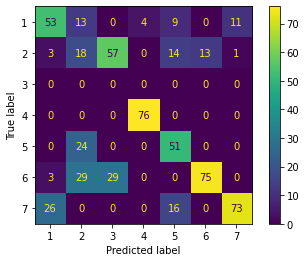

SVM_dc F1:  0.3718275658382916
SVM dc 


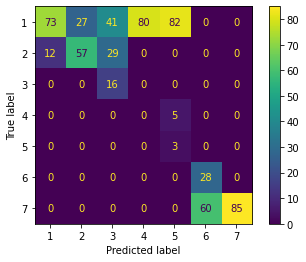

ADA_acc F1:  0.6127491020749936
AdaBoost acc


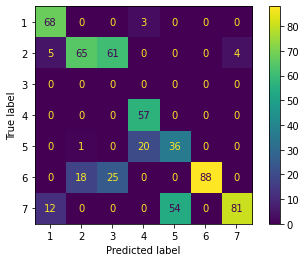

ADA_dc F1:  0.36697697084204844
AdaBoost dc


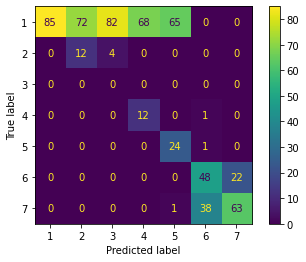

In [41]:
# 4.3

### Your code begins here ###

#confusion matrix and F1 score of individual classifiers
class_names = ['1','2','3','4','5','6', '7']

print("Confusion matrix: \n")

def confusion_mat_individual(classifier, name):
    print(name)
    cm = metrics.confusion_matrix(classifier, test_set['exercise_id'])
    metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
    plt.show()
    
    
print('SVM_acc F1: ', metrics.f1_score(svm_pred_acc, test_set['exercise_id'], average='macro'))
confusion_mat_individual(svm_pred_acc, 'SVM acc')


print('SVM_dc F1: ', metrics.f1_score(svm_pred_dc,test_set['exercise_id'], average='macro'))
confusion_mat_individual(svm_pred_dc, 'SVM dc ')


print('ADA_acc F1: ', metrics.f1_score(adaBoost_pred_acc, test_set['exercise_id'], average='macro'))
confusion_mat_individual(adaBoost_pred_acc, 'AdaBoost acc')


print('ADA_dc F1: ', metrics.f1_score(adaBoost_pred_dc, test_set['exercise_id'], average='macro'))
confusion_mat_individual(adaBoost_pred_dc, 'AdaBoost dc')


# classifier combinations
svm_acc_svm_dc = np.array((svm_probability_acc, svm_probability_dc))
ada_acc_ada_dc = np.array((adaBoost_probability_acc, adaBoost_probability_dc))
svm_acc_ada_dc = np.array((svm_probability_acc, adaBoost_probability_dc))
ada_acc_svm_dc = np.array((adaBoost_probability_acc, svm_probability_dc))



### Your code ends here ###

For indivdual classifiers, the best model is adaboost model for acc features which gives 0.61 F1 score while the adaboost on dc features provides the lowest moder performance with 0.36 F1


In [42]:
label = np.array([1,2,3,4,5,6,7])

# method to caclulate F1 score and confusion matrix of each combination operations
def get_f1_score(data, operator):
    if(operator == 'max'):
        acc = metrics.f1_score(label[np.argmax(np.max(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.max(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Max: ', acc)
        plt.show()
        return acc
    elif(operator == 'min'):
        acc = metrics.f1_score(label[np.argmax(np.min(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.min(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Min: ', acc)
        plt.show()
        return acc
    elif(operator == 'prod'):
        acc = metrics.f1_score(label[np.argmax(np.prod(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.prod(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Prod: ', acc)
        plt.show()
        return acc
    else:
        acc = metrics.f1_score(label[np.argmax(np.sum(data,axis=0),axis=1)],test_set['exercise_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['exercise_id'],label[np.argmax(np.sum(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Sum: ', acc)
        plt.show()
        return acc
    


### Classification rules on SVM_acc and SVM_dc combination

SVM_acc and SVM_dc F1 scores
Max:  0.41447473730082424


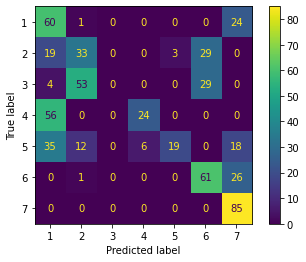

Min:  0.5114782550067191


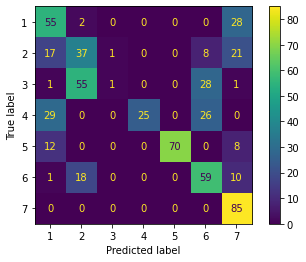

Prod:  0.5191938902686133


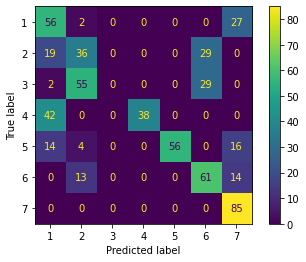

Sum:  0.43237254312516876


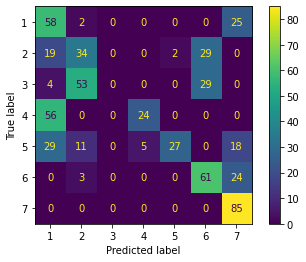

In [43]:

print("SVM_acc and SVM_dc F1 scores")

operators = ['max', 'min', 'prod', 'sum']

for i, val in enumerate(operators):
    get_f1_score(svm_acc_svm_dc, val)


For VM_acc and SVM_dc combination, production rule provides the best F1 score with 0.51 and max rule gives the lowest F1 score with 0.41


### Classification rules on AdaBoost acc and AdaBoost dc combination¶

AdaBoost acc and AdaBoost dc F1 scores
Max:  0.501058504124572


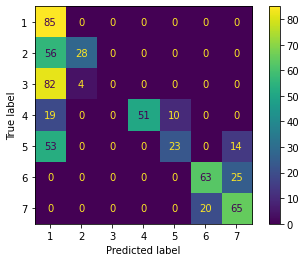

Min:  0.6887437639247509


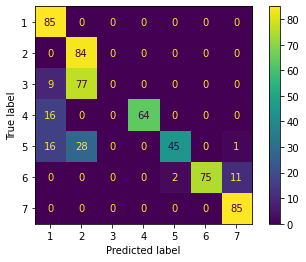

Prod:  0.6707697321037649


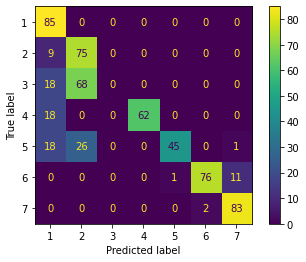

Sum:  0.6392407465825672


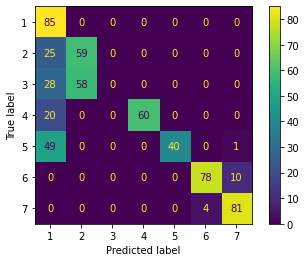

In [44]:

print("AdaBoost acc and AdaBoost dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(ada_acc_ada_dc, val)
    

For AdaBoost acc and AdaBoost dc combination, min rule provides the best F1 score with 0.68 and max rule gives the lowest F1 score with 0.50


### Classification rules on SVM acc and AdaBoost dc combination¶

SVM acc and AdaBoost dc F1 scores
Max:  0.5120869107836836


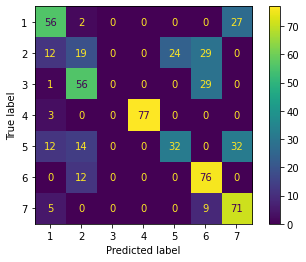

Min:  0.7467486046387781


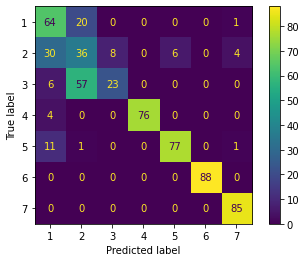

Prod:  0.6702259631857247


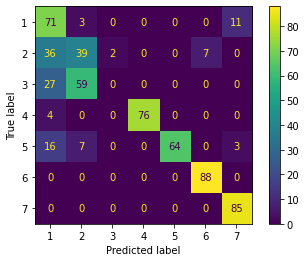

Sum:  0.5551253323469497


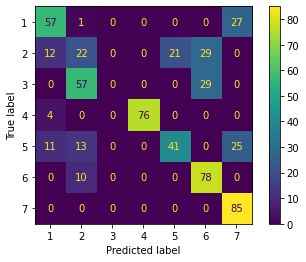

In [45]:
print("SVM acc and AdaBoost dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(svm_acc_ada_dc, val)


For SVM acc and AdaBoost dc combination, min rule provides the best F1 score with 0.74 and max rule gives the lowest F1 score with 0.51

The prediction of excercise 3 is really bad in all models

### Classification rules on AdaBoost acc and SVM dc combination¶

AdaBoost acc and SVM dc F1 scores
Max:  0.4113195719788295


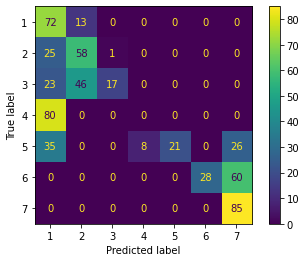

Min:  0.5750718661563965


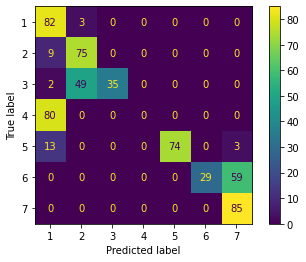

Prod:  0.5290134232264699


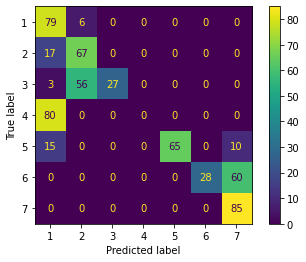

Sum:  0.463483464121549


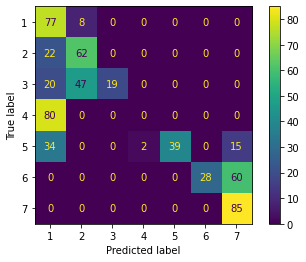

In [46]:
print("AdaBoost acc and SVM dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(ada_acc_svm_dc, val)
    

For AdaBoost acc and SVM dc combination, min rule provides the best F1 score with 0.57 and max rule gives the lowest F1 score with 0.41.

The prediction of excercise 4 is really bad in all models

### Evaluation Analysis

After considering all the combinations, the best model is minimum rule on SVM acc and AdaBoost dc combination. That gave us F1 score with 0.74. All the other rules are provides better results in the SVM acc and AdaBoost dc combination with compared to other combinations.

The lowest performance on the Maximum rule with AdaBoost acc and SVM dc combination. That model gives 0.41 F1 score. 

We used 4 rules, max, min, prod and sum. Maximum rule on all the combinations gave us low performance when comparing with the other 3 rules, while min rule gave the best performance other than in SVM_acc and SVM_dc combination.

Considering all the combinations, classifying excercise 3 and 4 has the lowest results 


# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [47]:
# 5.1

### Your code begins here ###

complete_data = pd.DataFrame.from_records(records)

# split train and test set 
def train_test_split(complete_data):
    train_df = complete_data.copy()
    test_df = complete_data.copy()
    
    
    for index, row in complete_data.iterrows(): 
        
        data_set = row['df']
        train=data_set.head(round(0.25*len(data_set)))
        test=data_set.drop(train.index)
    
            
        train_df.at[index, "df"] = train
        test_df.at[index, "df"] = test

    return train_df, test_df

        
train_df, test_df = train_test_split(complete_data)  

### Your code ends here ###

In [48]:
train_df.iloc[0]['df']


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250
...,...,...,...,...
1617,16170.0,-0.359375,-0.295312,0.828125
1618,16180.0,-0.359375,-0.281250,0.826562
1619,16190.0,-0.359375,-0.282986,0.812500
1620,16200.0,-0.359375,-0.293750,0.812500


In [49]:
test_df.iloc[0]['df']

,time,acc_0,acc_1,acc_2
1622,16220.0,-0.362847,-0.296875,0.812500
1623,16230.0,-0.375000,-0.301563,0.817187
1624,16240.0,-0.375000,-0.317188,0.828125
1625,16250.0,-0.369792,-0.333333,0.822917
1626,16260.0,-0.359375,-0.343750,0.812500
...,...,...,...,...
6483,64830.0,-0.625000,-0.725000,0.296875
6484,64840.0,-0.625000,-0.734375,0.296875
6485,64850.0,-0.625000,-0.726562,0.296875
6486,64860.0,-0.625000,-0.726562,0.289062


In [50]:
# Extract 5-second long windows with 2-second shift (3-second overlap)
# train dataset

   
def windowing(df):
    records_windowed = []

    time_window = 5000.
    time_offset = 2000.

    for row_idx, row_data in df.iterrows():
        df_tmp = row_data["df"]
        time_start = np.min(df_tmp["time"].to_numpy())
        time_end = np.max(df_tmp["time"].to_numpy())

        for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
            t1 = t0 + time_window
            # Handle boundary conditions - skip the measurements from the end shorter than window size
            if t1 > time_end:
                continue

            tmp_data = deepcopy(row_data)
            tmp_data["window_idx"] = window_idx
            tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                    (df_tmp["time"] < t1)].copy()

            records_windowed.append(tmp_data)

    df_records_windowed = pd.DataFrame.from_records(records_windowed)
    return df_records_windowed

train_windowed_data = windowing(train_df)
test_windowed_data = windowing(test_df)


In [51]:
print(f"Total windows extracted: {len(train_windowed_data)}")
print("Dataframe with all windowed records:")
display(train_windowed_data)
print("Dataframe with one windowed measurement series:")
display(train_windowed_data["df"].iloc[0])

Total windows extracted: 801
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4
...,...,...,...,...,...,...,...
796,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1
797,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2
798,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3
799,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250
...,...,...,...,...
495,4950.0,-0.578125,-0.593750,0.515625
496,4960.0,-0.578125,-0.593750,0.509375
497,4970.0,-0.578125,-0.600000,0.500000
498,4980.0,-0.578125,-0.615625,0.493750


In [52]:
print(f"Total windows extracted: {len(test_windowed_data)}")
print("Dataframe with all windowed records:")
display(test_windowed_data)
print("Dataframe with one windowed measurement series:")
display(test_windowed_data["df"].iloc[0])

Total windows extracted: 3040
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 16...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 18...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 20...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 22...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 24...,4
...,...,...,...,...,...,...,...
3035,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,17
3036,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,18
3037,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,19
3038,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,20


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
1622,16220.0,-0.362847,-0.296875,0.812500
1623,16230.0,-0.375000,-0.301563,0.817187
1624,16240.0,-0.375000,-0.317188,0.828125
1625,16250.0,-0.369792,-0.333333,0.822917
1626,16260.0,-0.359375,-0.343750,0.812500
...,...,...,...,...
2117,21170.0,-0.593750,-0.656250,0.368750
2118,21180.0,-0.598437,-0.656250,0.385937
2119,21190.0,-0.604167,-0.656250,0.375000
2120,21200.0,-0.587500,-0.656250,0.375000


In [53]:

# convert object types to int to make futher processing easier

df_train = train_windowed_data.copy() 
df_test = test_windowed_data.copy()

# merge 2 dataframes so that we can remove the unpaired windows.
def pair(df):

    df_acc = df[df['sensor_code'] == 'act']
    df_dc = df[df['sensor_code'] == 'dc']
    
    new_df = pd.merge(df_acc, df_dc,  how='inner', left_on=['subject_id','trial', 'window_idx', 'exercise_id'],
                      right_on = ['subject_id','trial', 'window_idx', 'exercise_id'])
    return new_df
    

df_train_pair = pair(df_train)
df_test_pair = pair(df_test)

# remove un necessary columns since we pair up the data we dont need this
df_train_pair = df_train_pair.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)
df_test_pair = df_test_pair.drop(['sensor_code_x','sensor_x', 'sensor_code_y', 'sensor_y'], axis=1)

df_train_pair = df_train_pair.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})
df_test_pair = df_test_pair.rename(columns={'df_x': 'df_acc', 'df_y': 'df_dc'})

### Your code ends here ###

print("==========  Training dataset  =============")

# df_train_pair.info()
print('Number of rows in training set - ', len(df_train_pair))
print('Number of Columns/dimentions in training set - ', len(df_train_pair.columns))
print('Shape of the training set - ', df_train_pair.shape)
print('Column names of training set - ', list(df_train_pair.columns))

print("\n==========  Testing dataset  =============")
print('Number of rows in test set - ', len(df_test_pair))
print('Number of Columns/dimentions in test set - ', len(df_test_pair.columns))
print('Shape of the test set - ', df_test_pair.shape)
print('Column names of test set - ', list(df_test_pair.columns))


==========  Training dataset  =============
Number of rows in training set -  397
Number of Columns/dimentions in training set -  6
Shape of the training set -  (397, 6)
Column names of training set -  ['subject_id', 'exercise_id', 'trial', 'df_acc', 'window_idx', 'df_dc']

==========  Testing dataset  =============
Number of rows in test set -  1515
Number of Columns/dimentions in test set -  6
Shape of the test set -  (1515, 6)
Column names of test set -  ['subject_id', 'exercise_id', 'trial', 'df_acc', 'window_idx', 'df_dc']


In [54]:
# 5.1

### Your code begins here ###
from scipy import signal

# downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix 
# of data for each 5 sec window. 

# get accelerometer  data from training set
train_set = df_train_pair.copy()
test_set = df_test_pair.copy()

test_set['df_acc'][0]
    
train_acc = np.array([downsample(drop_time(x)) for x in train_set['df_acc']])
test_acc = np.array([downsample(drop_time(x))  for x in test_set['df_acc']])

train_acc, test_acc = standardize_acc(train_acc,test_acc)

print(train_acc.shape)
print(test_acc.shape)

(397, 125, 3)
(1515, 125, 3)


In [55]:

from sklearn.decomposition import PCA

pca_train_df = train_set.copy()
pca_test_df = test_set.copy()

train_acc = np.array([downsample(drop_time(x)) for x in pca_train_df['df_acc']])
test_acc = np.array([downsample(drop_time(x)) for x in pca_test_df['df_acc']])

train_acc, test_acc = standardize_acc(train_acc,test_acc)

dim = 10
pca = PCA(n_components=dim)

train_meanstd = mean_std_vector(train_acc)
test_meanstd = mean_std_vector(test_acc)

pca_train_df['df_acc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(train_acc,train_meanstd))] # Combine function is called and train_mean_std_vector is placed at the end.
pca_test_df['df_acc'] = [combine_rows_horizontally(x) for i,x in enumerate(zip(test_acc,test_meanstd))]
### Your code ends here ###



In [56]:

### Your code begins here ###
dim = 10
pca = PCA(n_components=dim)

train_dc = np.array([drop_time(x).to_numpy() for x in pca_train_df['df_dc']])
test_dc = np.array([drop_time(x).to_numpy() for x in pca_test_df['df_dc']])

train_dc, test_dc = standardize_dc(train_dc,test_dc)

pca_train,pca_test = pca_transform_dc(train_dc,test_dc,dim)

pca_train_df['df_dc'] = [x.flatten() for i,x in enumerate(pca_train)]
pca_test_df['df_dc'] = [x.flatten() for i,x in enumerate(pca_test)]
### Your code ends here ###



In [57]:

feature_training_acc = [pd.DataFrame(train_acc[:,:,0]), pd.DataFrame(train_acc[:,:,1]), pd.DataFrame(train_acc[:,:,2]), pd.DataFrame(train_meanstd)]
feature_training_acc = pd.concat(feature_training_acc, axis=1, ignore_index=False)

feature_testing_acc = [pd.DataFrame(test_acc[:,:,0]), pd.DataFrame(test_acc[:,:,1]), pd.DataFrame(test_acc[:,:,2]), pd.DataFrame(test_meanstd)]
feature_testing_acc = pd.concat(feature_testing_acc, axis=1, ignore_index=False)

feature_training_dc = [pd.DataFrame(pca_train[:,0,:]), pd.DataFrame(pca_train[:,1,:]), pd.DataFrame(pca_train[:,2,:]),pd.DataFrame(pca_train[:,3,:]), pd.DataFrame(pca_train[:,4,:]) ]
feature_training_dc = pd.concat(feature_training_dc, axis=1, ignore_index=False)

feature_testing_dc = [pd.DataFrame(pca_test[:,0,:]), pd.DataFrame(pca_test[:,1,:]), pd.DataFrame(pca_test[:,2,:]),pd.DataFrame(pca_test[:,3,:]), pd.DataFrame(pca_test[:,4,:]) ]
feature_testing_dc = pd.concat(feature_testing_dc, axis=1, ignore_index=False)

print(feature_training_acc.shape)
print(feature_training_dc.shape)



(397, 381)
(397, 50)


In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
C = [0.1,1.0,10.0,100.0]
gamma = [0.1,0.25,0.5,0.75,1.0,2.0]
n_estimators = [50,100,500,1000]
learning_rate = [0.1,0.25,0.5,0.75,1.0]

# define model parameters
svm_parameters = {'C':C, 'gamma': gamma}
adaBoost_parameters = {'learning_rate': learning_rate,'n_estimators':n_estimators }

# models
svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)

svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
adaBoost = GridSearchCV(ada_model, adaBoost_parameters, cv=10)

In [59]:
# best hyperparams for acc data - SVM
svm_clf.fit(feature_training_acc, train_set['subject_id'])
svm_best_params_acc = svm_clf.best_params_
print('Best hyperparameters for SVM training acc data : ',svm_best_params_acc)

# best hyperparams for dc data - SVM

svm_clf.fit(feature_training_dc, train_set['subject_id'])
svm_best_params_dc = svm_clf.best_params_
print('Best hyperparameters for SVM training dc data: ',svm_best_params_dc)

# adabost - acc
adaBoost.fit(feature_training_acc, train_set['subject_id'])
ada_best_params_acc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_acc)

# adabost - dc
adaBoost.fit(feature_training_dc, train_set['subject_id'])
ada_best_params_dc = adaBoost.best_params_
print('Best hyperparameters for AdaBoost training acc :', ada_best_params_dc)

Best hyperparameters for SVM training acc data :  {'C': 10.0, 'gamma': 0.1}
Best hyperparameters for SVM training dc data:  {'C': 10.0, 'gamma': 0.1}
Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.25, 'n_estimators': 1000}
Best hyperparameters for AdaBoost training acc : {'learning_rate': 0.5, 'n_estimators': 1000}


In [60]:
# Training SVM with best hyper paremeters
svm_best_acc = svm.SVC(kernel='rbf', C=svm_best_params_acc['C'], gamma=svm_best_params_acc['gamma'], probability=True)
svm_best_acc.fit(feature_training_acc, train_set['subject_id'])

svm_best_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True)
svm_best_dc.fit(feature_training_dc, train_set['subject_id'])

svm_pred_acc = svm_best_acc.predict(feature_testing_acc)
svm_probability_acc = svm_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for acc data using SVM are')
print(svm_probability_acc)

svm_pred_dc = svm_best_dc.predict(feature_testing_dc)
svm_probability_dc = svm_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using SVM are')
print(svm_probability_dc)

The predicted probabilities for acc data using SVM are
[[0.10928578 0.12275712 0.08400016 ... 0.09420785 0.10426888 0.08560122]
 [0.10747344 0.12299462 0.08417851 ... 0.09437825 0.10451097 0.08580915]
 [0.10687211 0.12307168 0.08423672 ... 0.09443382 0.10458976 0.08587718]
 ...
 [0.07035952 0.07484938 0.05634416 ... 0.06683378 0.05951057 0.39415259]
 [0.09965359 0.11151339 0.07788367 ... 0.08896318 0.09249892 0.15689455]
 [0.09746169 0.10838333 0.07621675 ... 0.08739562 0.08940149 0.17504388]]
The predicted probabilities for dc data using SVM are
[[0.15909658 0.07256978 0.08108023 ... 0.05757797 0.14479458 0.13504439]
 [0.15825794 0.07264694 0.08113574 ... 0.05765183 0.14496005 0.13523279]
 [0.15824589 0.07264771 0.08114066 ... 0.05765258 0.14496179 0.13523478]
 ...
 [0.15824674 0.07264798 0.08113649 ... 0.05765282 0.14496228 0.13523532]
 [0.15824674 0.07264798 0.08113649 ... 0.05765282 0.14496228 0.13523532]
 [0.15824674 0.07264798 0.08113649 ... 0.05765282 0.14496228 0.13523532]]


In [61]:
# Train adaboost with best hyperparams
adaBoost_best_acc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_acc['learning_rate'], n_estimators=ada_best_params_acc['n_estimators'] )
adaBoost_best_acc.fit(feature_training_acc, train_set['subject_id'])

adaBoost_best_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] )
adaBoost_best_dc.fit(feature_training_dc, train_set['subject_id'])


adaBoost_pred_acc = adaBoost_best_acc.predict(feature_testing_acc)
adaBoost_probability_acc = adaBoost_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for dc data using AdaBoost are')
print(adaBoost_probability_acc)

adaBoost_pred_dc = adaBoost_best_dc.predict(feature_testing_dc)
adaBoost_probability_dc = adaBoost_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using AdaBoost are')
print(adaBoost_probability_dc)

### Your code ends here ###


The predicted probabilities for dc data using AdaBoost are
[[0.16882106 0.04620317 0.12772473 ... 0.11562336 0.08500438 0.09056035]
 [0.15784806 0.03699467 0.10961958 ... 0.10236812 0.07171796 0.07854047]
 [0.18923335 0.03538915 0.11573469 ... 0.11065525 0.08479497 0.10434455]
 ...
 [0.04404575 0.02237517 0.05361426 ... 0.04968187 0.15696862 0.16554033]
 [0.02791462 0.01512929 0.04396087 ... 0.03808901 0.16449578 0.18267023]
 [0.03800305 0.01948348 0.05528685 ... 0.05214126 0.13590467 0.17824232]]
The predicted probabilities for dc data using AdaBoost are
[[0.31033926 0.0779614  0.20709897 ... 0.04444721 0.03727111 0.05078757]
 [0.24102533 0.01814309 0.22710712 ... 0.03685695 0.068732   0.12485125]
 [0.25444465 0.01230909 0.20077104 ... 0.06516891 0.08544897 0.07034563]
 ...
 [0.09345658 0.00063296 0.04591591 ... 0.04662014 0.3681373  0.27714092]
 [0.10235344 0.0033461  0.01991876 ... 0.0818203  0.19578116 0.34203168]
 [0.07394454 0.00375364 0.05148194 ... 0.03659553 0.13036747 0.41629

Confusion matrix: 

SVM_acc F1:  0.7965134999237493
SVM acc CM


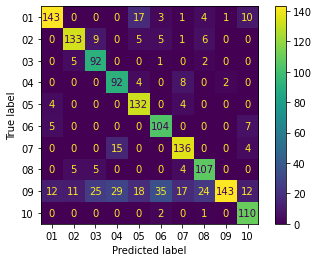

SVM_dc F1:  0.5198004156610075
SVM dc 


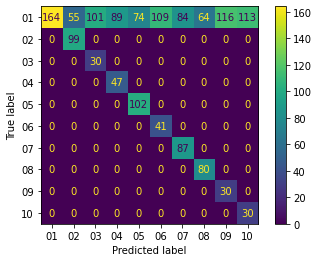

ADA_acc F1:  0.5263204925511431
AdaBoost acc


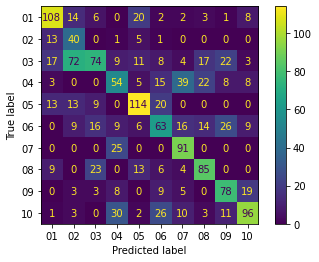

ADA_dc F1:  0.6221456982074541
AdaBoost dc


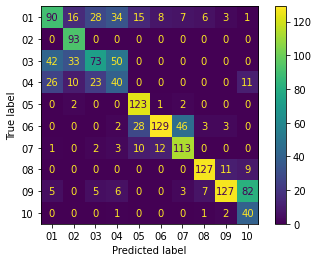

In [62]:
# 5.1
from sklearn import metrics
### Your code begins here ###

#confusion matrix and F1 score of individual classifiers
class_names = ['01','02','03','04','05','06', '07','08','09','10']

print("Confusion matrix: \n")

def confusion_mat_individual(classifier, name):
    print(name)
    cm = metrics.confusion_matrix(classifier, test_set['subject_id'])
    metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
    plt.show()
    
print('SVM_acc F1: ', metrics.f1_score(svm_pred_acc, test_set['subject_id'], average='macro'))
confusion_mat_individual(svm_pred_acc, 'SVM acc CM')


print('SVM_dc F1: ', metrics.f1_score(svm_pred_dc,test_set['subject_id'], average='macro'))
confusion_mat_individual(svm_pred_dc, 'SVM dc ')


print('ADA_acc F1: ', metrics.f1_score(adaBoost_pred_acc, test_set['subject_id'], average='macro'))
confusion_mat_individual(adaBoost_pred_acc, 'AdaBoost acc')


print('ADA_dc F1: ', metrics.f1_score(adaBoost_pred_dc, test_set['subject_id'], average='macro'))
confusion_mat_individual(adaBoost_pred_dc, 'AdaBoost dc')


# classifier combinations
svm_acc_svm_dc = np.array((svm_probability_acc, svm_probability_dc))
ada_acc_ada_dc = np.array((adaBoost_probability_acc, adaBoost_probability_dc))
svm_acc_ada_dc = np.array((svm_probability_acc, adaBoost_probability_dc))
ada_acc_svm_dc = np.array((adaBoost_probability_acc, svm_probability_dc))



### Your code ends here ###

In [63]:
label = np.array(['01','02','03','04','05','06','07','08','09','10'])

# method to caclulate F1 score and confusion matrix of each combination operations
def get_f1_score(data, operator):
    if(operator == 'max'):
        acc = metrics.f1_score(label[np.argmax(np.max(data,axis=0),axis=1)],test_set['subject_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['subject_id'],label[np.argmax(np.max(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Max: ', acc)
        plt.show()
        return acc
    elif(operator == 'min'):
        acc = metrics.f1_score(label[np.argmax(np.min(data,axis=0),axis=1)],test_set['subject_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['subject_id'],label[np.argmax(np.min(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Min: ', acc)
        plt.show()
        return acc
    elif(operator == 'prod'):
        acc = metrics.f1_score(label[np.argmax(np.prod(data,axis=0),axis=1)],test_set['subject_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['subject_id'],label[np.argmax(np.prod(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Prod: ', acc)
        plt.show()
        return acc
    else:
        acc = metrics.f1_score(label[np.argmax(np.sum(data,axis=0),axis=1)],test_set['subject_id'], average='macro')
        cm = metrics.confusion_matrix(test_set['subject_id'],label[np.argmax(np.sum(data,axis=0),axis=1)])
        metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
        print('Sum: ', acc)
        plt.show()
        return acc

SVM_acc and SVM_dc F1 scores
Max:  0.7932330629722537


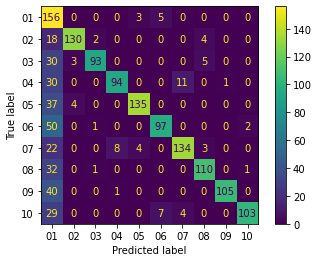

Min:  0.7973460552391599


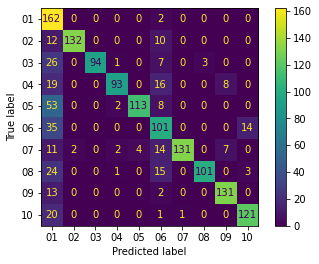

Prod:  0.8094747607004038


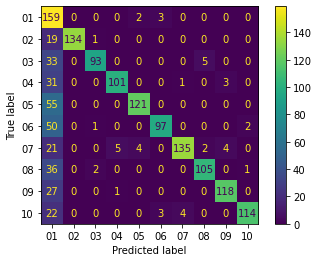

Sum:  0.8011041070327736


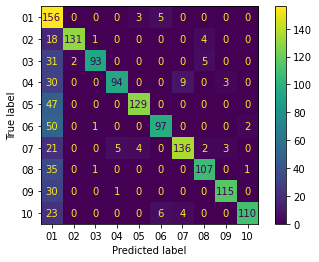

In [64]:

print("SVM_acc and SVM_dc F1 scores")

operators = ['max', 'min', 'prod', 'sum']

for i, val in enumerate(operators):
    get_f1_score(svm_acc_svm_dc, val)

AdaBoost acc and AdaBoost dc F1 scores
Max:  0.6254252037206448


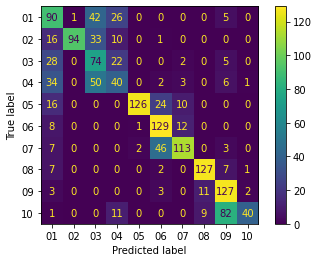

Min:  0.7420416321435088


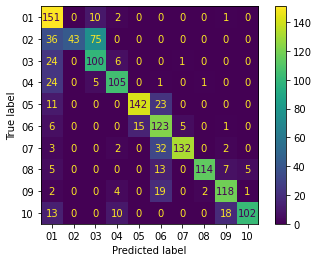

Prod:  0.738268000480731


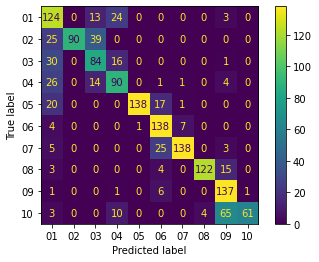

Sum:  0.6966503456942685


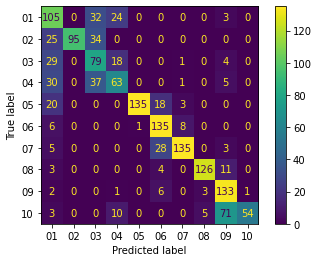

In [65]:

print("AdaBoost acc and AdaBoost dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(ada_acc_ada_dc, val)

SVM acc and AdaBoost dc F1 scores
Max:  0.8150767920796023


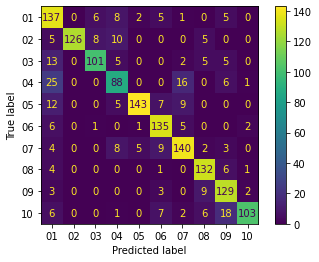

Min:  0.8736577077678916


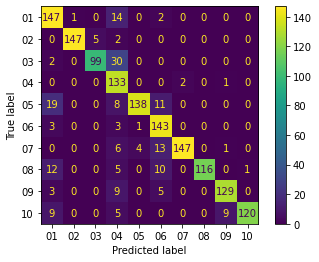

Prod:  0.8885053617909768


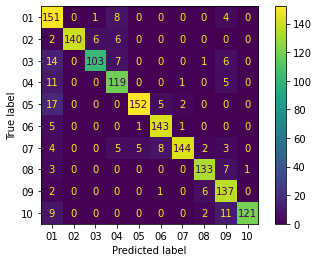

Sum:  0.8483779332253165


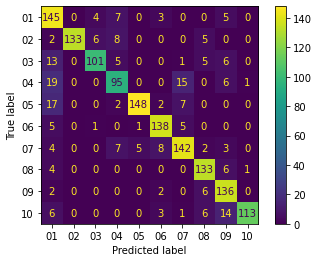

In [66]:
print("SVM acc and AdaBoost dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(svm_acc_ada_dc, val)

AdaBoost acc and SVM dc F1 scores
Max:  0.6854476327590063


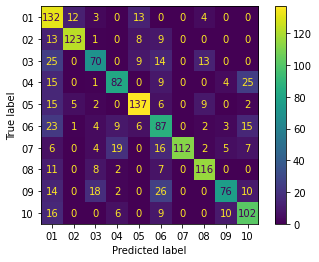

Min:  0.6450680833455821


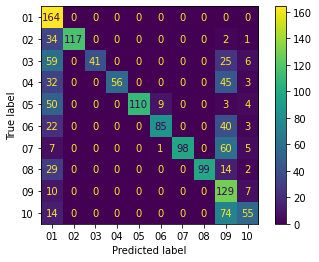

Prod:  0.6898616382049723


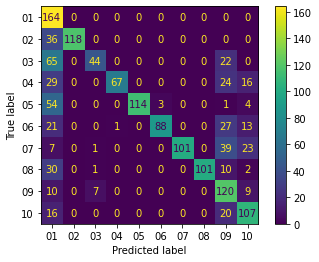

Sum:  0.6912027411535736


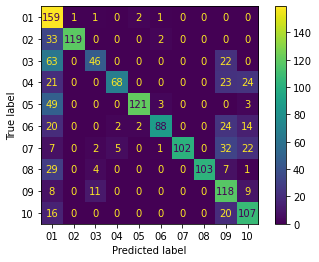

In [67]:
print("AdaBoost acc and SVM dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(ada_acc_svm_dc, val)
    

Classification model to identify subjects - Best results is SVM acc and AdaBoost dc combination with Prod rule where F1 score is 0.88. 

### Task 5.2

In this task we introduced new classification model combining RandomForestClassifier and KNeighborsClassifier classifier using 4 basic rules (sum, prod, min and max)

found the best hyperparameters for RandomForestClassifier and KNeighborsClassifier using GridSearchCV with 10 fold cross validation.

We were able to beat the previous models with F1 score 0.96 for prod rule in random forest accelerometer and random forest depth camera feature combination



In [68]:
# 5.2

### Your code begins here ###
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

n_estimators = [50,100,500,1000]
n_neighbors = [1,3,5,7,9]
max_depth = [1,3,5,7,9]


# define model parameters
knn_parameters = {'n_neighbors': n_neighbors}
rf_parameters = {'n_estimators':n_estimators, 'max_depth': max_depth}

# models
rf_model = RandomForestClassifier(random_state=0)
knn_model = KNeighborsClassifier()

rf = GridSearchCV(rf_model, rf_parameters, cv=10)
knn = GridSearchCV(knn_model, knn_parameters, cv=10)
### Your code ends here ###

In [69]:
# best hyperparams for acc data - rf
rf.fit(feature_training_acc, train_set['subject_id'])
rf_best_params_acc = rf.best_params_
print('Best hyperparameters for rf training acc data : ',rf_best_params_acc)

# best hyperparams for dc data - rf

rf.fit(feature_training_dc, train_set['subject_id'])
rf_best_params_dc = rf.best_params_
print('Best hyperparameters for rf training dc data: ',rf_best_params_dc)

# adabost - acc
knn.fit(feature_training_acc, train_set['subject_id'])
knn_best_params_acc = knn.best_params_
print('Best hyperparameters for knn training acc :', knn_best_params_acc)

# adabost - dc
knn.fit(feature_training_dc, train_set['subject_id'])
knn_best_params_dc = knn.best_params_
print('Best hyperparameters for knn training acc :', knn_best_params_dc)

Best hyperparameters for rf training acc data :  {'max_depth': 9, 'n_estimators': 500}
Best hyperparameters for rf training dc data:  {'max_depth': 9, 'n_estimators': 1000}
Best hyperparameters for knn training acc : {'n_neighbors': 1}
Best hyperparameters for knn training acc : {'n_neighbors': 1}


In [70]:
# Training rf with best hyper paremeters
rf_best_acc = RandomForestClassifier(random_state=0,max_depth=rf_best_params_acc['max_depth'], n_estimators=rf_best_params_acc['n_estimators'])
rf_best_acc.fit(feature_training_acc, train_set['subject_id'])

rf_best_dc = RandomForestClassifier(random_state=0,max_depth=rf_best_params_acc['max_depth'],  n_estimators=rf_best_params_acc['n_estimators'])
rf_best_dc.fit(feature_training_dc, train_set['subject_id'])

rf_pred_acc = rf_best_acc.predict(feature_testing_acc)
rf_probability_acc = rf_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for acc data using rf are')
print(rf_probability_acc)

rf_pred_dc = rf_best_dc.predict(feature_testing_dc)
rf_probability_dc = rf_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using rf are')
print(rf_probability_dc)

The predicted probabilities for acc data using rf are
[[0.40265205 0.05648996 0.06278569 ... 0.10304892 0.12653852 0.05009733]
 [0.47820019 0.04022588 0.07064015 ... 0.09091102 0.11550625 0.02474564]
 [0.5670753  0.04320712 0.04805545 ... 0.06990727 0.07688994 0.03020041]
 ...
 [0.02041217 0.00641141 0.06305227 ... 0.05585297 0.04050183 0.26687381]
 [0.02741189 0.00855833 0.0771024  ... 0.05990751 0.04090154 0.43608398]
 [0.01520935 0.01072614 0.03774309 ... 0.04858694 0.05151991 0.36132301]]
The predicted probabilities for dc data using rf are
[[0.50896656 0.07291308 0.11189306 ... 0.04959232 0.02812564 0.04857086]
 [0.32346263 0.03793833 0.139046   ... 0.09921497 0.04665673 0.08440864]
 [0.36785164 0.05315741 0.10218398 ... 0.06598157 0.08015103 0.0753074 ]
 ...
 [0.08709722 0.01011538 0.02456667 ... 0.03512667 0.15463474 0.55191859]
 [0.10256667 0.002      0.0112381  ... 0.0254015  0.06239493 0.67719792]
 [0.06536296 0.00422222 0.024      ... 0.02574921 0.07662282 0.72181528]]


In [71]:
# Train adaboost with best hyperparams
knn_best_acc = KNeighborsClassifier( n_neighbors=knn_best_params_acc['n_neighbors'] )
knn_best_acc.fit(feature_training_acc, train_set['subject_id'])

knn_best_dc = KNeighborsClassifier( n_neighbors=knn_best_params_dc['n_neighbors'] )
knn_best_dc.fit(feature_training_dc, train_set['subject_id'])


knn_pred_acc = knn_best_acc.predict(feature_testing_acc)
knn_probability_acc = knn_best_acc.predict_proba(feature_testing_acc)
print('The predicted probabilities for dc data using knn are')
print(knn_probability_acc)

knn_pred_dc = knn_best_dc.predict(feature_testing_dc)
knn_probability_dc = knn_best_dc.predict_proba(feature_testing_dc)
print('The predicted probabilities for dc data using knn are')
print(knn_probability_dc)

### Your code ends here ###


The predicted probabilities for dc data using knn are
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
The predicted probabilities for dc data using knn are
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Confusion matrix: 

rf_acc F1:  0.8548780022261819
rf acc CM
rf_dc F1:  0.8956017901008778
rf dc 
knn_acc F1:  0.86992900035135
knn acc
knn_dc F1:  0.8951944592102927
knn dc


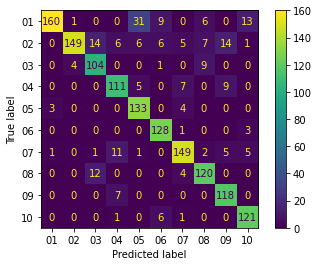

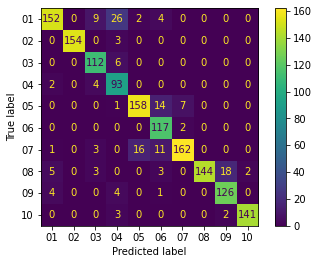

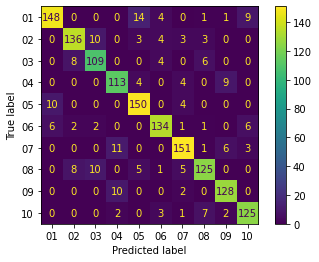

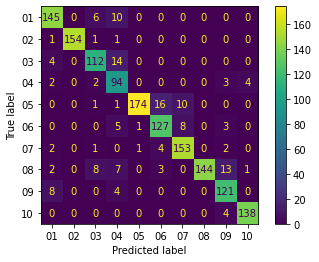

In [72]:
# 5.2
from sklearn import metrics
### Your code begins here ###

#confusion matrix and F1 score of individual classifiers
class_names = ['01','02','03','04','05','06', '07','08','09','10']

print("Confusion matrix: \n")

def confusion_mat_individual(classifier, name):
    print(name)
    cm = metrics.confusion_matrix(classifier, test_set['subject_id'])
    metrics.ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
    
    
print('rf_acc F1: ', metrics.f1_score(rf_pred_acc, test_set['subject_id'], average='macro'))
confusion_mat_individual(rf_pred_acc, 'rf acc CM')


print('rf_dc F1: ', metrics.f1_score(rf_pred_dc,test_set['subject_id'], average='macro'))
confusion_mat_individual(rf_pred_dc, 'rf dc ')


print('knn_acc F1: ', metrics.f1_score(knn_pred_acc, test_set['subject_id'], average='macro'))
confusion_mat_individual(knn_pred_acc, 'knn acc')


print('knn_dc F1: ', metrics.f1_score(knn_pred_dc, test_set['subject_id'], average='macro'))
confusion_mat_individual(knn_pred_dc, 'knn dc')


# classifier combinations
rf_acc_rf_dc = np.array((rf_probability_acc, rf_probability_dc))
knn_acc_knn_dc = np.array((knn_probability_acc, knn_probability_dc))
rf_acc_knn_dc = np.array((rf_probability_acc, knn_probability_dc))
knn_acc_rf_dc = np.array((knn_probability_acc, rf_probability_dc))



### Your code ends here ###

rf_acc and rf_dc F1 scores
Max:  0.9198955275726741


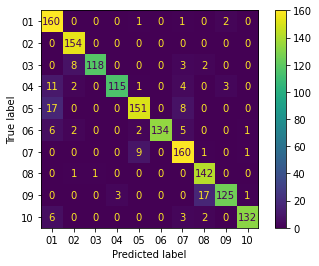

Min:  0.9549453713892646


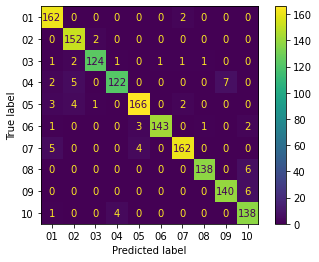

Prod:  0.9611907475989232


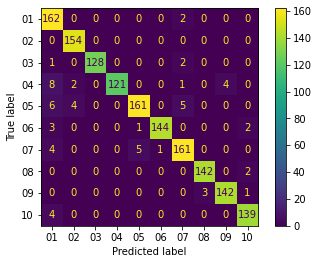

Sum:  0.9522489274324049


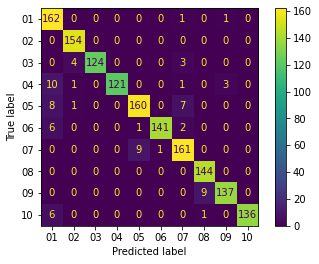

In [73]:

print("rf_acc and rf_dc F1 scores")

operators = ['max', 'min', 'prod', 'sum']

for i, val in enumerate(operators):
    get_f1_score(rf_acc_rf_dc, val)

knn acc and knn dc F1 scores
Max:  0.8726234175836127


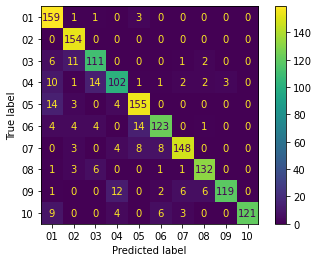

Min:  0.8517795334702178


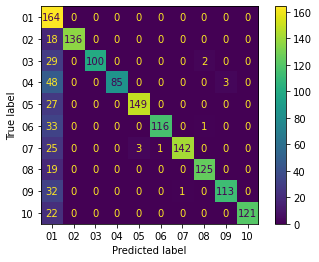

Prod:  0.8517795334702178


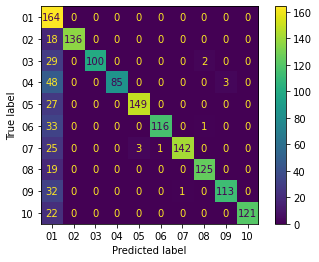

Sum:  0.8726234175836127


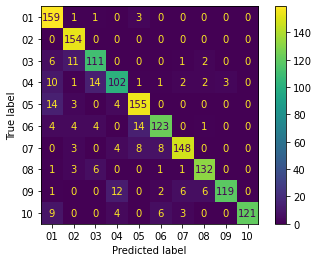

In [74]:

print("knn acc and knn dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(knn_acc_knn_dc, val)

rf acc and knn dc F1 scores
Max:  0.8951944592102927


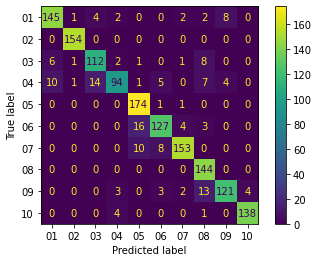

Min:  0.8951944592102927


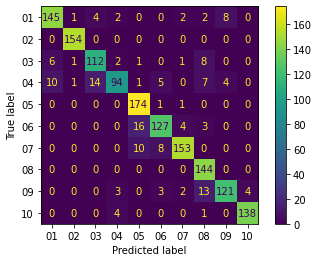

Prod:  0.8951944592102927


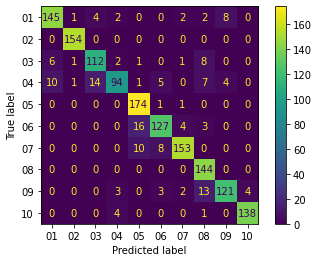

Sum:  0.8951944592102927


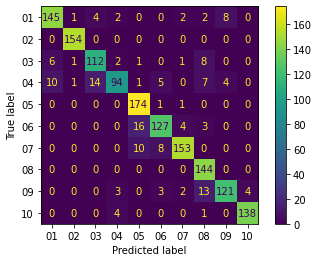

In [75]:
print("rf acc and knn dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(rf_acc_knn_dc, val)

knn acc and rf dc F1 scores
Max:  0.86992900035135


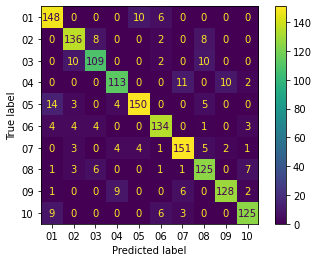

Min:  0.8699896993928558


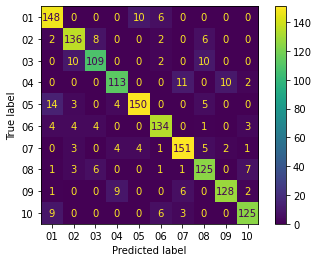

Prod:  0.8699896993928558


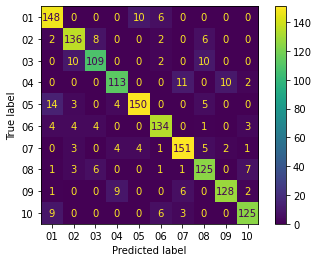

Sum:  0.86992900035135


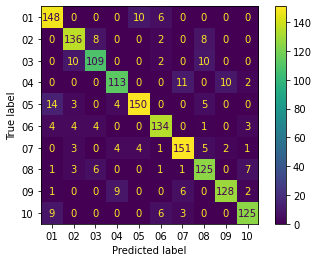

In [76]:
print("knn acc and rf dc F1 scores")

for i, val in enumerate(operators):
    get_f1_score(knn_acc_rf_dc, val)
    

For this 5.2 task we have tried with random forest classifier and knn classifier combinations with 4 basic rules and the best results we got with the prod rule on random forest acc features and random forest dc features with 0.961 F1 score.